## Imports

In [1]:
from pathlib import Path
import pandas as pd
import os
import warnings
import seaborn as sns
import matplotlib.pyplot as plt

## Configs

In [2]:
ccee_data_path = Path(r'..\..\01_dados\dados_ccee')
ccee_merged_data_path = Path(r'..\..\01_dados\dados_ccee_merged')
ons_data_path = Path(r'..\..\01_dados\dados_ons')
ons_merged_data_path = Path(r'..\..\01_dados\dados_ons_merged')
save_data_path = Path(r'..\..\01_dados\dados_hidraulicas_mre_x_dados_ons')


warnings.filterwarnings('ignore')

## funções auxiliares

In [3]:
def custom_replace(s):
    first_comma = s.find(',')
    second_comma = s.find(',', first_comma + 1)
    if first_comma != -1:
        s = s[:first_comma] + s[first_comma+1:]
    if second_comma != -1:
        s = s[:second_comma] + '.' + s[second_comma+1:]
    return s

## Busca por algo relevante

In [4]:
df_ccee = pd.read_csv(ccee_merged_data_path / 'hidraulicas_mre/hidraulicas_mre.csv', encoding='utf-8')

In [5]:
df_ccee.head(5)

Cód. Parcela - Usina Sigla Parcela - Usina       Fonte Submercado  \
0                   201                FURNAS  Hidráulica    SUDESTE   
1                   201                FURNAS  Hidráulica    SUDESTE   
2                   201                FURNAS  Hidráulica    SUDESTE   
3                   201                FURNAS  Hidráulica    SUDESTE   
4                   201                FURNAS  Hidráulica    SUDESTE   

   Geração no Centro de Gravidade - MW médios (Gp,j) - MWh  \
0                                         105.752205         
1                                         104.011893         
2                                         104.191811         
3                                         104.350077         
4                                         104.207881         

   Fator de Abatimento de Perdas Internas Instantâneas (F_PDIp,j)  \
0                                           0.973220                
1                                           0.972917                
2                                           0.971762                
3                                           0.971061                
4                                           0.971166                

   Fator de Rateio das Perdas de Geração (UXP_GLFp,j)*  \
0                                           0.969164     
1                                           0.968155     
2                                           0.968905     
3                                           0.968573     
4                                           0.968064     

   Deslocamento Hidráulico Energético Preliminar (DH_ENER_PRE_UHp,j)  \
0                                                0.0                   
1                                                0.0                   
2                                                0.0                   
3                                                0.0                   
4                                                0.0                   

   Garantia física modulada ajustada pelo fator de disponibilidade (GFIS_2p,j)  \
0                                         434.521845                             
1                                         402.454240                             
2                                         374.365687                             
3                                         363.787185                             
4                                         360.668040                             

   Garantia Física de Repasse de Risco Hidrológico Modulada e Ajustada (GFIS_2_RRHp,j) - MWh  \
0                                         577.334486                                           
1                                         534.727342                                           
2                                         497.407032                                           
3                                         483.351734                                           
4                                         479.207432                                           

   Garantis Física Modulada Ajustada de Repasse do Risco Hidrológico (GFIS_3_RRHp,j) - MWh  \
0                                         451.554312                                         
1                                         418.611884                                         
2                                         389.131297                                         
3                                         378.249187                                         
4                                         375.178959                                         

   Fator de Risco Hidrológico aceito pelo gerador, variando entre 0 e 11% (Fp,j)  \
0                                                NaN                               
1                                                NaN                               
2                                                NaN                               
3                            

In [6]:
nan_percentages = df_ccee.isna().mean() * 100

print("NaN percentages per column:")
print(nan_percentages)

NaN percentages per column:
Cód. Parcela - Usina                                                                          0.000000
Sigla Parcela - Usina                                                                         0.000000
Fonte                                                                                         0.000000
Submercado                                                                                    0.000000
Geração no Centro de Gravidade - MW médios (Gp,j) - MWh                                       0.000000
Fator de Abatimento de Perdas Internas Instantâneas (F_PDIp,j)                                0.000000
Fator de Rateio das Perdas de Geração (UXP_GLFp,j)*                                           0.000000
Deslocamento Hidráulico Energético Preliminar (DH_ENER_PRE_UHp,j)                             0.000000
Garantia física modulada ajustada pelo fator de disponibilidade (GFIS_2p,j)                   7.820018
Garantia Física de Repasse de Risco Hidrológi

identifiquei que o cod parcela nada mais é do que o cod da parcela usina onde existe na values, vou corrigir isso

In [7]:
df_ccee.Submercado.unique()

array(['SUDESTE', 'NORDESTE', 'SUL', 'NORTE'], dtype=object)

Agora fazer um dicionário para padronizar o a coluna submercado com as colunas da ONS

In [8]:
sub_mercado_dict = {
    'NORDESTE':'NE',
    'NORTE':'N',
    'SUDESTE':'SE',
    'SUL':'S'
}

df_ccee['id_subsistema'] = df_ccee.Submercado.apply(lambda x: sub_mercado_dict[x])

In [9]:
df_ccee['din_instante'] = df_ccee['din_instante'].str.replace('-([0-9]+)\.0', lambda x: '-{}'.format(int(float(x.group(1)))), regex=True)

df_ccee['din_instante'] = pd.to_datetime(df_ccee['din_instante'])

In [10]:
df_ccee.head()

Cód. Parcela - Usina Sigla Parcela - Usina       Fonte Submercado  \
0                   201                FURNAS  Hidráulica    SUDESTE   
1                   201                FURNAS  Hidráulica    SUDESTE   
2                   201                FURNAS  Hidráulica    SUDESTE   
3                   201                FURNAS  Hidráulica    SUDESTE   
4                   201                FURNAS  Hidráulica    SUDESTE   

   Geração no Centro de Gravidade - MW médios (Gp,j) - MWh  \
0                                         105.752205         
1                                         104.011893         
2                                         104.191811         
3                                         104.350077         
4                                         104.207881         

   Fator de Abatimento de Perdas Internas Instantâneas (F_PDIp,j)  \
0                                           0.973220                
1                                           0.972917                
2                                           0.971762                
3                                           0.971061                
4                                           0.971166                

   Fator de Rateio das Perdas de Geração (UXP_GLFp,j)*  \
0                                           0.969164     
1                                           0.968155     
2                                           0.968905     
3                                           0.968573     
4                                           0.968064     

   Deslocamento Hidráulico Energético Preliminar (DH_ENER_PRE_UHp,j)  \
0                                                0.0                   
1                                                0.0                   
2                                                0.0                   
3                                                0.0                   
4                                                0.0                   

   Garantia física modulada ajustada pelo fator de disponibilidade (GFIS_2p,j)  \
0                                         434.521845                             
1                                         402.454240                             
2                                         374.365687                             
3                                         363.787185                             
4                                         360.668040                             

   Garantia Física de Repasse de Risco Hidrológico Modulada e Ajustada (GFIS_2_RRHp,j) - MWh  \
0                                         577.334486                                           
1                                         534.727342                                           
2                                         497.407032                                           
3                                         483.351734                                           
4                                         479.207432                                           

   Garantis Física Modulada Ajustada de Repasse do Risco Hidrológico (GFIS_3_RRHp,j) - MWh  \
0                                         451.554312                                         
1                                         418.611884                                         
2                                         389.131297                                         
3                                         378.249187                                         
4                                         375.178959                                         

   Fator de Risco Hidrológico aceito pelo gerador, variando entre 0 e 11% (Fp,j)  \
0                                                NaN                               
1                                                NaN                               
2                                                NaN                               
3                            

In [11]:
df_ccee

Cód. Parcela - Usina Sigla Parcela - Usina           Fonte  \
0                          201                FURNAS      Hidráulica   
1                          201                FURNAS      Hidráulica   
2                          201                FURNAS      Hidráulica   
3                          201                FURNAS      Hidráulica   
4                          201                FURNAS      Hidráulica   
...                        ...                   ...             ...   
14360371                946192      SPE JACUTINGA SA  Hidráulica CGH   
14360372                946192      SPE JACUTINGA SA  Hidráulica CGH   
14360373                946192      SPE JACUTINGA SA  Hidráulica CGH   
14360374                946192      SPE JACUTINGA SA  Hidráulica CGH   
14360375                946192      SPE JACUTINGA SA  Hidráulica CGH   

         Submercado  Geração no Centro de Gravidade - MW médios (Gp,j) - MWh  \
0           SUDESTE                                         105.752205         
1           SUDESTE                                         104.011893         
2           SUDESTE                                         104.191811         
3           SUDESTE                                         104.350077         
4           SUDESTE                                         104.207881         
...             ...                                                ...         
14360371        SUL                                           0.000000         
14360372        SUL                                           0.000000         
14360373        SUL                                           0.000000         
14360374        SUL                                           0.000000         
14360375        SUL                                           0.000000         

          Fator de Abatimento de Perdas Internas Instantâneas (F_PDIp,j)  \
0                                                  0.973220                
1                                                  0.972917                
2                                                  0.971762                
3                                                  0.971061                
4                                                  0.971166                
...                                                     ...                
14360371                                           1.000000                
14360372                                           1.000000                
14360373                                           1.000000                
14360374                                           1.000000                
14360375                                           1.000000                

          Fator de Rateio das Perdas de Geração (UXP_GLFp,j)*  \
0                                                  0.969164     
1                                                  0.968155     
2                                                  0.968905     
3                                                  0.968573     
4                                                  0.968064     
...                                                     ...     
14360371                                           1.000000     
14360372                                           1.000000     
14360373                                           1.000000     
14360374                                           1.000000     
14360375                                           1.000000     

          Deslocamento Hidráulico Energético Preliminar (DH_ENER_PRE_UHp,j)  \
0                                                       0.0                   
1                                                       0.0                   
2                                                       0.0                   
3                                                       0.0                   
4                                                       0.0                   
...             

### Primeiro Merge - balanco-energia-dessem 

In [12]:
dados_ons = pd.read_csv(ons_merged_data_path / 'balanco-energia-dessem/balanco-energia-dessem.csv', sep=';')
dados_ons.drop('nom_subsistema', axis=1, inplace=True)
dados_ons

id_subsistema         din_instante  val_demanda  \
0                 NE  2020-01-01 00:00:00     10234.99   
1                  N  2020-01-01 00:00:00      5140.64   
2                 SE  2020-01-01 00:00:00     31281.76   
3                  S  2020-01-01 00:00:00      9984.74   
4                 NE  2020-01-01 00:30:00     10267.97   
...              ...                  ...          ...   
238843             S  2023-06-29 23:00:00     11000.79   
238844            NE  2023-06-29 23:30:00     12084.37   
238845             N  2023-06-29 23:30:00      7659.73   
238846            SE  2023-06-29 23:30:00     37739.57   
238847             S  2023-06-29 23:30:00     10347.95   

        val_geracaohidraulicamwmed  val_geracaopchmwmed  \
0                          2679.23                 45.0   
1                          4484.11                  7.0   
2                         30415.20               1390.0   
3                          2157.19                500.0   
4                          2676.61                 45.0   
...                            ...                  ...   
238843                     6595.32                940.0   
238844                     1648.90                113.0   
238845                     8178.15                 50.0   
238846                    32318.45               1892.0   
238847                     5880.75                940.0   

        val_geracaotermicamwed  val_geracaopctmwmed  val_geracaoeolicamwmed  \
0                      2148.90                330.0                  1497.0   
1                      2785.00                  0.0                    72.0   
2                      6713.00                725.0                     4.0   
3                      1378.00                282.0                   626.0   
4                      2128.40                337.0                  1437.0   
...                        ...                  ...                     ...   
238843                  606.00                116.0                   377.0   
238844                    3.00                318.0                 13733.0   
238845                 1147.17                 41.0                   236.0   
238846                 2776.50               3031.0                     5.0   
238847                  606.00                121.0                   408.0   

        val_geracaofotovoltaicamwmed  
0                                0.0  
1                                NaN  
2                                0.0  
3                                0.0  
4                                0.0  
...                              ...  
238843                           0.0  
238844                           0.0  
238845                           0.0  
238846                           0.0  
238847                           0.0  

[238848 rows x 9 columns]

In [13]:
na_count_per_column = dados_ons.isna().sum()
print(na_count_per_column)

id_subsistema                       0
din_instante                        0
val_demanda                         0
val_geracaohidraulicamwmed          0
val_geracaopchmwmed               190
val_geracaotermicamwed              0
val_geracaopctmwmed               155
val_geracaoeolicamwmed             82
val_geracaofotovoltaicamwmed    35274
dtype: int64


Perguntar para o Roberto qual melhor forma de preencher valores nulos no caso das variáveis acima para não prejudicar o sentido físico.

por enquanto preencheremos com 0.

In [14]:
dados_ons.fillna(0, inplace=True)

Agora vamos trazer os dados de meia em meia hora e somá-los para tornar dados horários

In [15]:
dados_ons['din_instante'] = pd.to_datetime(dados_ons['din_instante'])

dados_ons['din_instante'] = dados_ons['din_instante'].dt.floor('H')

# now group by the rounded date and 'id' and perform the sum
result_df = dados_ons.groupby(['id_subsistema', 'din_instante']).sum().reset_index()

In [16]:
result_df

id_subsistema        din_instante  val_demanda  \
0                  N 2020-01-01 00:00:00     10294.20   
1                  N 2020-01-01 01:00:00     10350.33   
2                  N 2020-01-01 02:00:00     10373.14   
3                  N 2020-01-01 03:00:00     10315.36   
4                  N 2020-01-01 04:00:00     10226.30   
...              ...                 ...          ...   
119419            SE 2023-06-29 19:00:00     95027.95   
119420            SE 2023-06-29 20:00:00     92604.79   
119421            SE 2023-06-29 21:00:00     89980.35   
119422            SE 2023-06-29 22:00:00     84128.71   
119423            SE 2023-06-29 23:00:00     77216.82   

        val_geracaohidraulicamwmed  val_geracaopchmwmed  \
0                          8937.90                 14.0   
1                          8753.13                 14.0   
2                          8642.72                 14.0   
3                          8436.98                 14.0   
4                          8231.91                 16.0   
...                            ...                  ...   
119419                    73076.60               3866.0   
119420                    70952.28               3858.0   
119421                    70029.34               3829.0   
119422                    68156.67               3813.0   
119423                    65816.52               3791.0   

        val_geracaotermicamwed  val_geracaopctmwmed  val_geracaoeolicamwmed  \
0                       5570.0                  0.0                   147.0   
1                       5572.0                  0.0                   152.0   
2                       5580.0                  0.0                   152.0   
3                       5580.0                  0.0                   155.0   
4                       5580.0                  0.0                   163.0   
...                        ...                  ...                     ...   
119419                  5553.0               5999.0                    10.0   
119420                  5553.0               6021.0                    10.0   
119421                  5553.0               6034.0                    10.0   
119422                  5553.0               6057.0                    10.0   
119423                  5553.0               6062.0                    10.0   

        val_geracaofotovoltaicamwmed  
0                                0.0  
1                                0.0  
2                                0.0  
3                                0.0  
4                                0.0  
...                              ...  
119419                           0.0  
119420                           0.0  
119421                           0.0  
119422                           0.0  
119423                           0.0  

[119424 rows x 9 columns]

In [17]:
df_final = pd.merge(df_ccee,
                    result_df,
                    on=['din_instante', 'id_subsistema'],
                    how='left')
df_final

Cód. Parcela - Usina Sigla Parcela - Usina           Fonte  \
0                          201                FURNAS      Hidráulica   
1                          201                FURNAS      Hidráulica   
2                          201                FURNAS      Hidráulica   
3                          201                FURNAS      Hidráulica   
4                          201                FURNAS      Hidráulica   
...                        ...                   ...             ...   
14360371                946192      SPE JACUTINGA SA  Hidráulica CGH   
14360372                946192      SPE JACUTINGA SA  Hidráulica CGH   
14360373                946192      SPE JACUTINGA SA  Hidráulica CGH   
14360374                946192      SPE JACUTINGA SA  Hidráulica CGH   
14360375                946192      SPE JACUTINGA SA  Hidráulica CGH   

         Submercado  Geração no Centro de Gravidade - MW médios (Gp,j) - MWh  \
0           SUDESTE                                         105.752205         
1           SUDESTE                                         104.011893         
2           SUDESTE                                         104.191811         
3           SUDESTE                                         104.350077         
4           SUDESTE                                         104.207881         
...             ...                                                ...         
14360371        SUL                                           0.000000         
14360372        SUL                                           0.000000         
14360373        SUL                                           0.000000         
14360374        SUL                                           0.000000         
14360375        SUL                                           0.000000         

          Fator de Abatimento de Perdas Internas Instantâneas (F_PDIp,j)  \
0                                                  0.973220                
1                                                  0.972917                
2                                                  0.971762                
3                                                  0.971061                
4                                                  0.971166                
...                                                     ...                
14360371                                           1.000000                
14360372                                           1.000000                
14360373                                           1.000000                
14360374                                           1.000000                
14360375                                           1.000000                

          Fator de Rateio das Perdas de Geração (UXP_GLFp,j)*  \
0                                                  0.969164     
1                                                  0.968155     
2                                                  0.968905     
3                                                  0.968573     
4                                                  0.968064     
...                                                     ...     
14360371                                           1.000000     
14360372                                           1.000000     
14360373                                           1.000000     
14360374                                           1.000000     
14360375                                           1.000000     

          Deslocamento Hidráulico Energético Preliminar (DH_ENER_PRE_UHp,j)  \
0                                                       0.0                   
1                                                       0.0                   
2                                                       0.0                   
3                                                       0.0                   
4                                                       0.0                   
...             

In [18]:
na_count_per_column = df_final.isna().sum()
print(na_count_per_column)

Cód. Parcela - Usina                                                                                0
Sigla Parcela - Usina                                                                               0
Fonte                                                                                               0
Submercado                                                                                          0
Geração no Centro de Gravidade - MW médios (Gp,j) - MWh                                             0
Fator de Abatimento de Perdas Internas Instantâneas (F_PDIp,j)                                      0
Fator de Rateio das Perdas de Geração (UXP_GLFp,j)*                                                 0
Deslocamento Hidráulico Energético Preliminar (DH_ENER_PRE_UHp,j)                                   0
Garantia física modulada ajustada pelo fator de disponibilidade (GFIS_2p,j)                   1122984
Garantia Física de Repasse de Risco Hidrológico Modulada e Ajustada (GFIS_2_RRHp,j

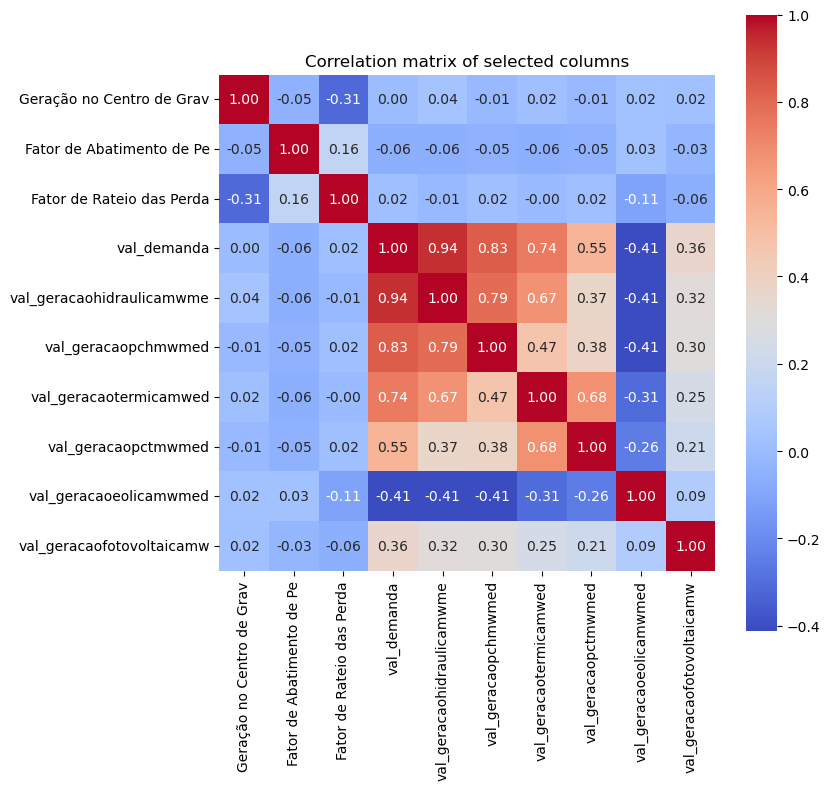

In [19]:
df_subset = df_final[['Geração no Centro de Gravidade - MW médios (Gp,j) - MWh',
                      'Fator de Abatimento de Perdas Internas Instantâneas (F_PDIp,j)',
                      'Fator de Rateio das Perdas de Geração (UXP_GLFp,j)*',
                      'din_instante',
                      'id_subsistema',
                      'val_demanda',
                      'val_geracaohidraulicamwmed',
                      'val_geracaopchmwmed',
                      'val_geracaotermicamwed',
                      'val_geracaopctmwmed',
                      'val_geracaoeolicamwmed',
                      'val_geracaofotovoltaicamwmed']]

# Truncate column names to the first 25 characters
df_subset.columns = [col[:25] for col in df_subset.columns]

# Calculate the correlation matrix
corr = df_subset.corr()

plt.figure(figsize=(8,8))
sns.heatmap(corr, annot=True, fmt=".2f", cmap='coolwarm', square=True)
plt.title('Correlation matrix of selected columns')
plt.show()

esse foi o gráfico geral, vamos dividir por subsistema para ver se existe alguma relação mais forte, é possível identificar correlação positiva e negativa forte entre os dados da ons e uma pequena correlaçao positiva entre val_geraçãoopct e geração no centro de grav das usinas de biomassa.

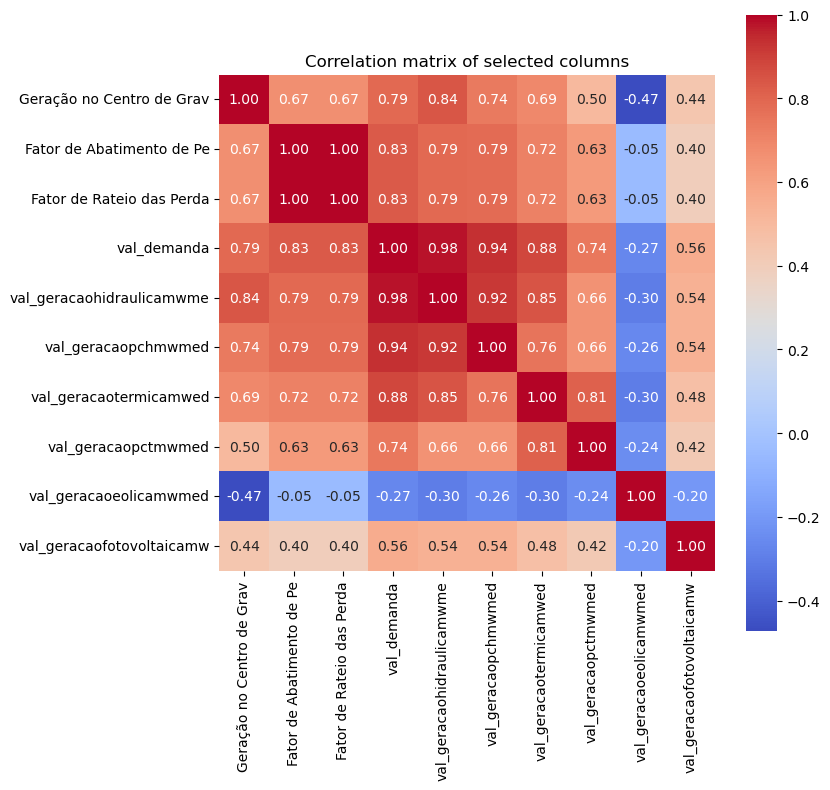

In [20]:
df_subset = df_final[['Geração no Centro de Gravidade - MW médios (Gp,j) - MWh',
                      'Fator de Abatimento de Perdas Internas Instantâneas (F_PDIp,j)',
                      'Fator de Rateio das Perdas de Geração (UXP_GLFp,j)*',
                      'din_instante',
                      'id_subsistema',
                      'val_demanda',
                      'val_geracaohidraulicamwmed',
                      'val_geracaopchmwmed',
                      'val_geracaotermicamwed',
                      'val_geracaopctmwmed',
                      'val_geracaoeolicamwmed',
                      'val_geracaofotovoltaicamwmed']]

df_subset = df_subset.groupby(['id_subsistema', 'din_instante']).sum().reset_index()

# Truncate column names to the first 25 characters
df_subset.columns = [col[:25] for col in df_subset.columns]

# Calculate the correlation matrix
corr = df_subset.corr()

plt.figure(figsize=(8,8))
sns.heatmap(corr, annot=True, fmt=".2f", cmap='coolwarm', square=True)
plt.title('Correlation matrix of selected columns')
plt.show()

Quando Agrupados por data/hora e subsistema a correlação se mostra muito mais relevante, o mapa de correlação antereior mostra dividido pela granularidade de usina, quando somamos todas as usinas do subsistema a análise se torna mais relevante.

Vamos tentar agora separa por susbstema.

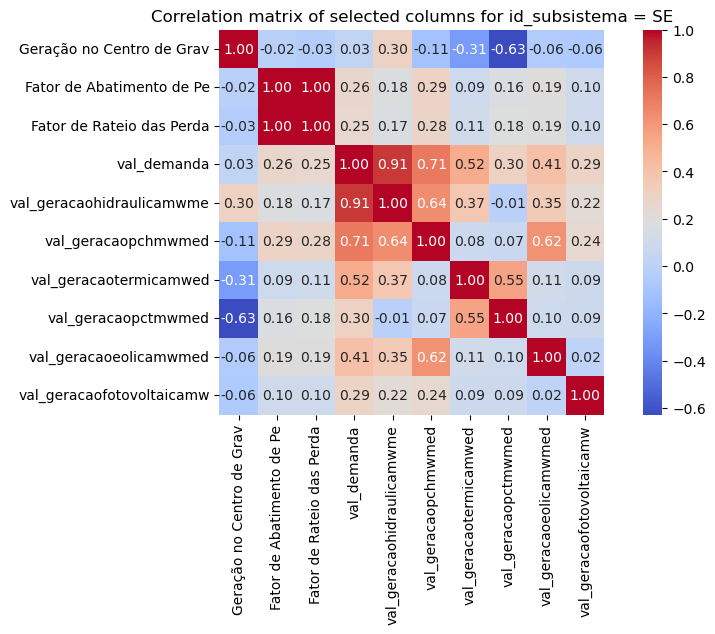

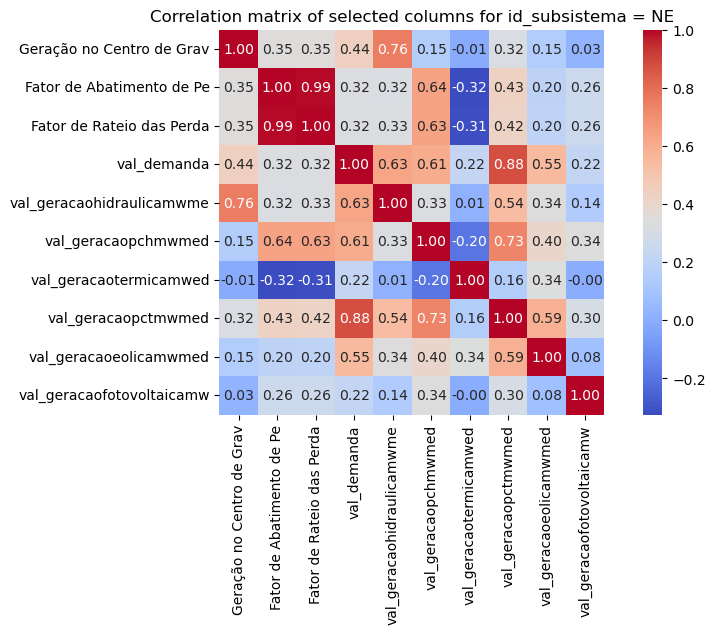

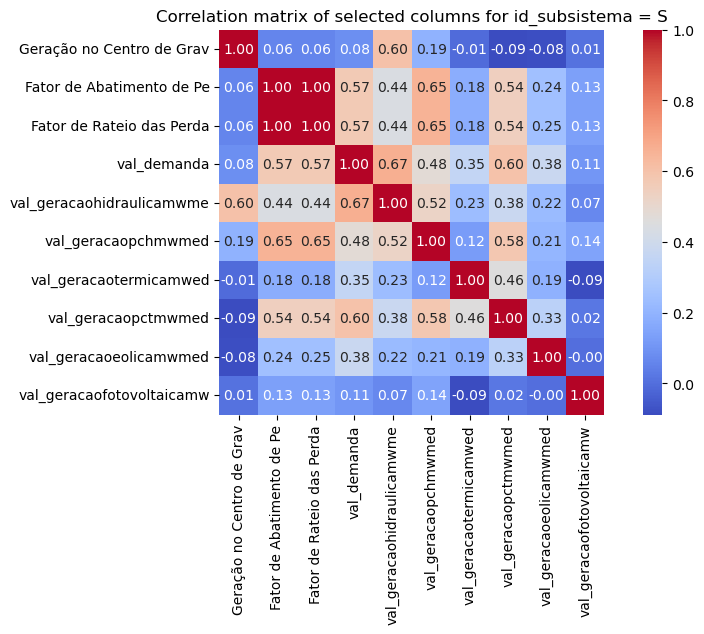

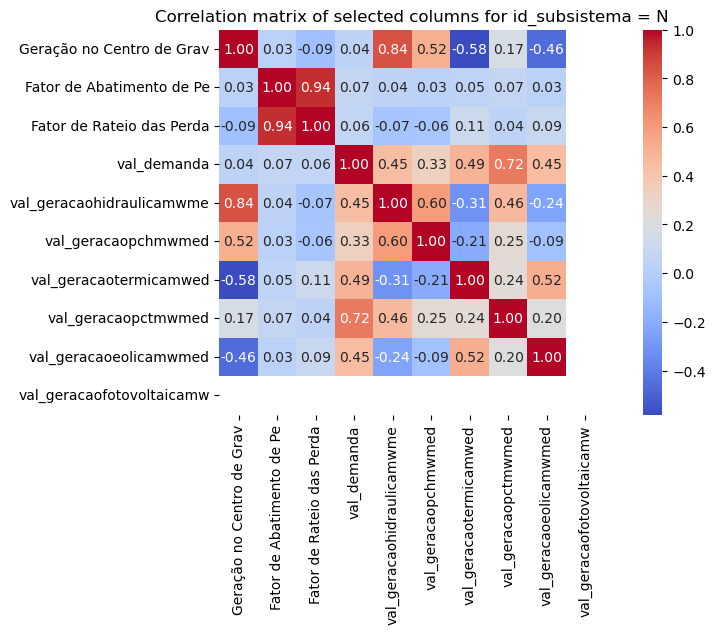

In [21]:
# Get unique values of 'id_subsistema'
ids = df_final['id_subsistema'].unique()

# Loop over unique ids
for id in ids:
    # Subset dataframe for current id
    df_subset = df_final[df_final['id_subsistema'] == id][
        ['Geração no Centro de Gravidade - MW médios (Gp,j) - MWh',
        'Fator de Abatimento de Perdas Internas Instantâneas (F_PDIp,j)',
        'Fator de Rateio das Perdas de Geração (UXP_GLFp,j)*',
        'din_instante',
        'id_subsistema',
        'val_demanda',
        'val_geracaohidraulicamwmed',
        'val_geracaopchmwmed',
        'val_geracaotermicamwed',
        'val_geracaopctmwmed',
        'val_geracaoeolicamwmed',
        'val_geracaofotovoltaicamwmed']
    ]
    
    df_subset = df_subset.groupby(['din_instante']).sum().reset_index()
    
    # Truncate column names to the first 25 characters
    df_subset.columns = [col[:25] for col in df_subset.columns]

    # Calculate the correlation matrix
    corr = df_subset.corr()

    # Plot the correlation matrix
    plt.figure(figsize=(10,5))
    sns.heatmap(corr, annot=True, fmt=".2f", cmap='coolwarm', square=True)
    plt.title(f'Correlation matrix of selected columns for id_subsistema = {id}')
    plt.show()

quando separado por subsistema o Nordeste e Norte apresentam menos peso, Sul me Sudeste mostram maior correlação entre as variáveis

### Segundo Merge - balanco-energia-subsistema

In [22]:
dados_ons = pd.read_csv(ons_merged_data_path / 'balanco-energia-subsistema/balanco-energia-subsistema.csv', sep=';')
dados_ons.drop('nom_subsistema', axis=1, inplace=True)
dados_ons.rename(columns={'id_subsistena':'id_subsistema'},inplace=True)
dados_ons

id_subsistema         din_instante  val_gerhidraulica  val_gertermica  \
0                  NE  2000-01-01 00:00:00        5337.700000        0.000000   
1                   N  2000-01-01 00:00:00        2422.500000        0.000000   
2                 SIN  2000-01-01 00:00:00       31977.000000     2649.100000   
3                  SE  2000-01-01 00:00:00       20479.800000     1418.600000   
4                   S  2000-01-01 00:00:00        3737.000000     1230.500000   
...               ...                  ...                ...             ...   
1029136            NE  2023-06-27 23:00:00        4445.669922      416.807007   
1029137             N  2023-06-27 23:00:00        9119.923828     1675.775024   
1029138           SIN  2023-06-27 23:00:00       48416.371000     9264.440000   
1029139            SE  2023-06-27 23:00:00       26389.136719     6367.804199   
1029140             S  2023-06-27 23:00:00        8461.639648      804.054016   

         val_gereolica  val_gersolar  val_carga  val_intercambio  
0             0.000000         0.000   5340.200           -2.500  
1             0.000000         0.000   2373.700           48.800  
2                  NaN           NaN  34673.900          -47.800  
3             0.000000         0.000  21183.000          715.400  
4             0.000000         0.000   5777.000         -809.500  
...                ...           ...        ...              ...  
1029136   11773.042969         0.381  11921.754         4714.147  
1029137      87.401001         0.000   7674.563         3208.537  
1029138   12657.211000         2.202  68518.550         1821.680  
1029139       5.000000         0.821  38079.549        -5316.787  
1029140     791.767029         1.000  10842.681         -784.220  

[1029141 rows x 8 columns]

In [23]:
na_count_per_column = dados_ons.isna().sum()
print(na_count_per_column)

id_subsistema             0
din_instante              0
val_gerhidraulica       288
val_gertermica          288
val_gereolica         54954
val_gersolar         136041
val_carga              1195
val_intercambio        1195
dtype: int64


In [24]:
dados_ons.fillna(0, inplace=True)

In [25]:
dados_ons['din_instante'] = pd.to_datetime(dados_ons['din_instante'])

dados_ons['din_instante'] = dados_ons['din_instante'].dt.floor('H')

# now group by the rounded date and 'id' and perform the sum
result_df = dados_ons.groupby(['id_subsistema', 'din_instante']).sum().reset_index()

In [26]:
df_final = pd.merge(df_ccee,
                    result_df,
                    on=['din_instante', 'id_subsistema'],
                    how='inner')
df_final

Cód. Parcela - Usina Sigla Parcela - Usina       Fonte Submercado  \
0                          201                FURNAS  Hidráulica    SUDESTE   
1                          202               PEIXOTO  Hidráulica    SUDESTE   
2                          203     ESTREITO (FURNAS)  Hidráulica    SUDESTE   
3                          204        PORTO COLOMBIA  Hidráulica    SUDESTE   
4                          205            MARIMBONDO  Hidráulica    SUDESTE   
...                        ...                   ...         ...        ...   
14347687                893062        FERREIRA GOMES  Hidráulica      NORTE   
14347688                894627            BELO MONTE  Hidráulica      NORTE   
14347689                894628  BELO MONTE- PIMENTAL  Hidráulica      NORTE   
14347690                896384         COARACY NUNES  Hidráulica      NORTE   
14347691                907551  STO ANT D JARI - RRH  Hidráulica      NORTE   

          Geração no Centro de Gravidade - MW médios (Gp,j) - MWh  \
0                                                105.752205         
1                                                106.552013         
2                                                121.944776         
3                                                194.995985         
4                                                344.834607         
...                                                     ...         
14347687                                          61.254369         
14347688                                         259.774371         
14347689                                          74.943714         
14347690                                          60.679692         
14347691                                         158.618058         

          Fator de Abatimento de Perdas Internas Instantâneas (F_PDIp,j)  \
0                                                  0.973220                
1                                                  0.981302                
2                                                  0.983594                
3                                                  0.996060                
4                                                  0.991179                
...                                                     ...                
14347687                                           0.981719                
14347688                                           0.982236                
14347689                                           0.974651                
14347690                                           0.993678                
14347691                                           0.986684                

          Fator de Rateio das Perdas de Geração (UXP_GLFp,j)*  \
0                                                  0.969164     
1                                                  0.969164     
2                                                  0.969164     
3                                                  1.000000     
4                                                  0.969164     
...                                                     ...     
14347687                                           0.974293     
14347688                                           0.974293     
14347689                                           0.974293     
14347690                                           1.000000     
14347691                                           0.974293     

          Deslocamento Hidráulico Energético Preliminar (DH_ENER_PRE_UHp,j)  \
0                                                  0.000000                   
1                                                  0.000000                   
2                                                  0.000000                   
3                                                  0.000000                   
4                                                  0.000000                   
...                                                     ...     

In [27]:
na_count_per_column = df_final.isna().sum()
print(na_count_per_column)

Cód. Parcela - Usina                                                                                0
Sigla Parcela - Usina                                                                               0
Fonte                                                                                               0
Submercado                                                                                          0
Geração no Centro de Gravidade - MW médios (Gp,j) - MWh                                             0
Fator de Abatimento de Perdas Internas Instantâneas (F_PDIp,j)                                      0
Fator de Rateio das Perdas de Geração (UXP_GLFp,j)*                                                 0
Deslocamento Hidráulico Energético Preliminar (DH_ENER_PRE_UHp,j)                                   0
Garantia física modulada ajustada pelo fator de disponibilidade (GFIS_2p,j)                   1122928
Garantia Física de Repasse de Risco Hidrológico Modulada e Ajustada (GFIS_2_RRHp,j

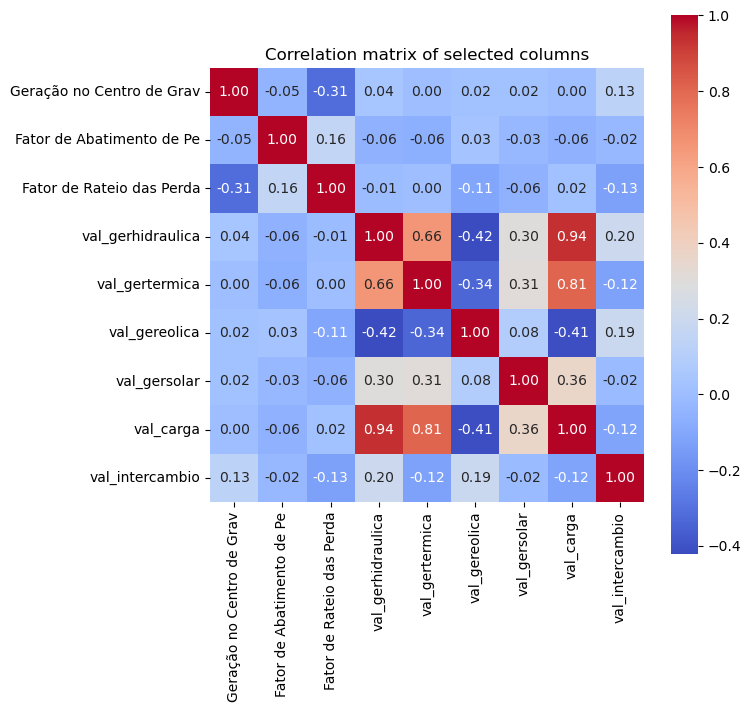

In [28]:
# Subset the dataframe to include only the columns of interest
df_subset = df_final[['Geração no Centro de Gravidade - MW médios (Gp,j) - MWh',
                      'Fator de Abatimento de Perdas Internas Instantâneas (F_PDIp,j)',
                      'Fator de Rateio das Perdas de Geração (UXP_GLFp,j)*',
                      'din_instante',
                      'id_subsistema',
                      'val_gerhidraulica',
                      'val_gertermica',
                      'val_gereolica',
                      'val_gersolar',
                      'val_carga',
                      'val_intercambio']]

# Truncate column names to the first 25 characters
df_subset.columns = [col[:25] for col in df_subset.columns]

# Calculate the correlation matrix
corr = df_subset.corr()

plt.figure(figsize=(7,7))
sns.heatmap(corr, annot=True, fmt=".2f", cmap='coolwarm', square=True)
plt.title('Correlation matrix of selected columns')
plt.show()

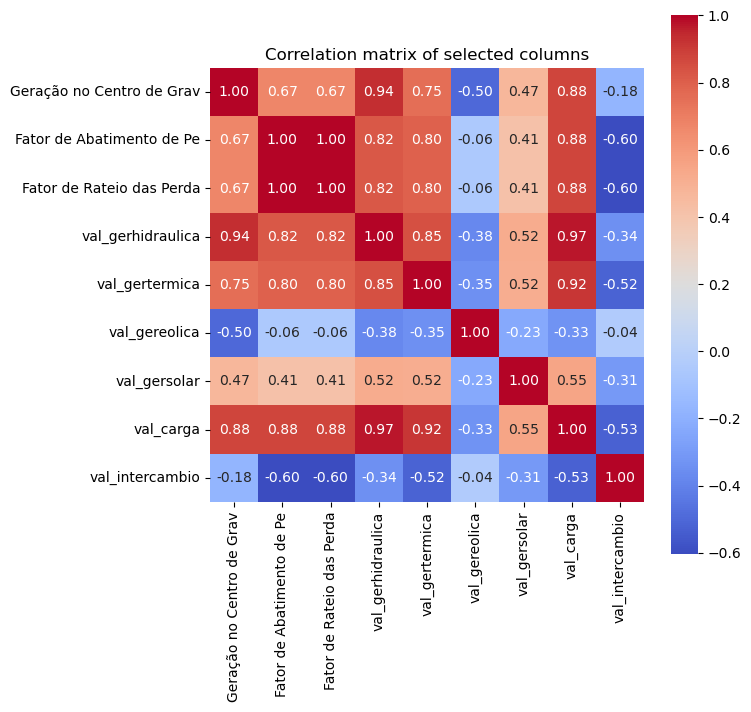

In [29]:
df_subset = df_subset.groupby(['id_subsistema', 'din_instante']).sum().reset_index()

# Truncate column names to the first 25 characters
df_subset.columns = [col[:25] for col in df_subset.columns]

# Calculate the correlation matrix
corr = df_subset.corr()

plt.figure(figsize=(7,7))
sns.heatmap(corr, annot=True, fmt=".2f", cmap='coolwarm', square=True)
plt.title('Correlation matrix of selected columns')
plt.show()

novamente os dados agregados por subsistema mostram uma correlação muito forte comparada aos dados não agregados

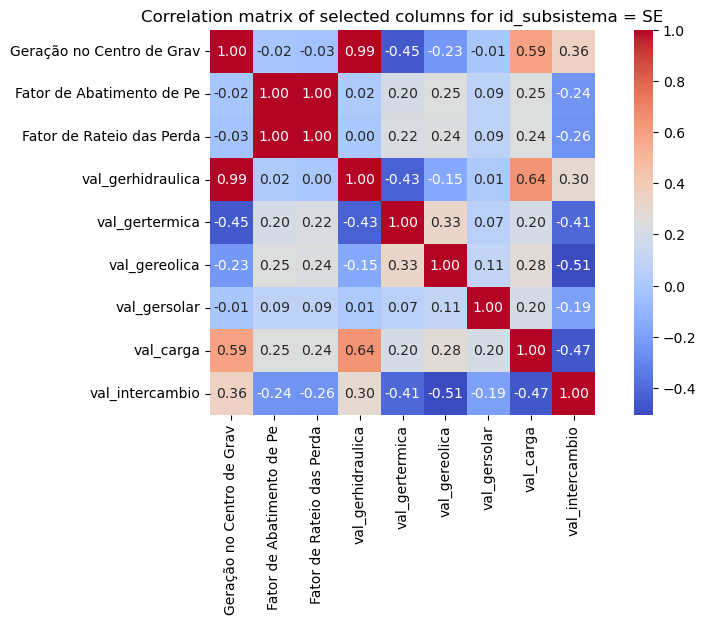

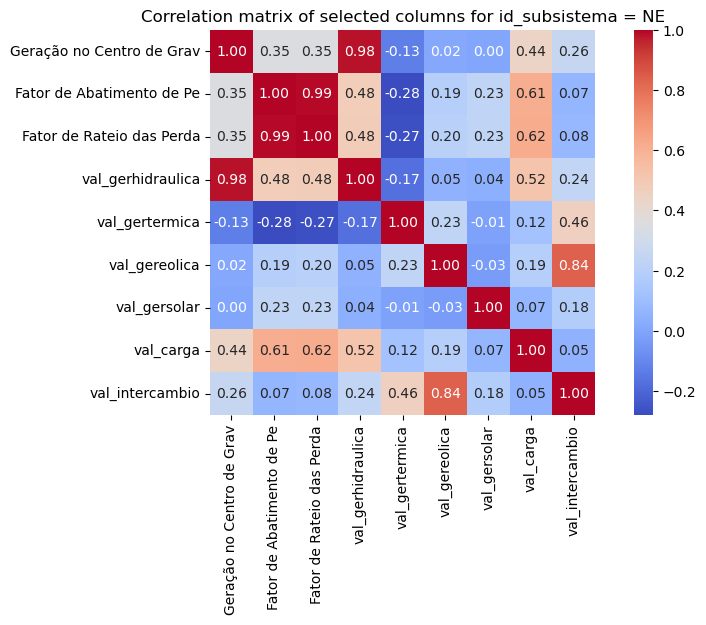

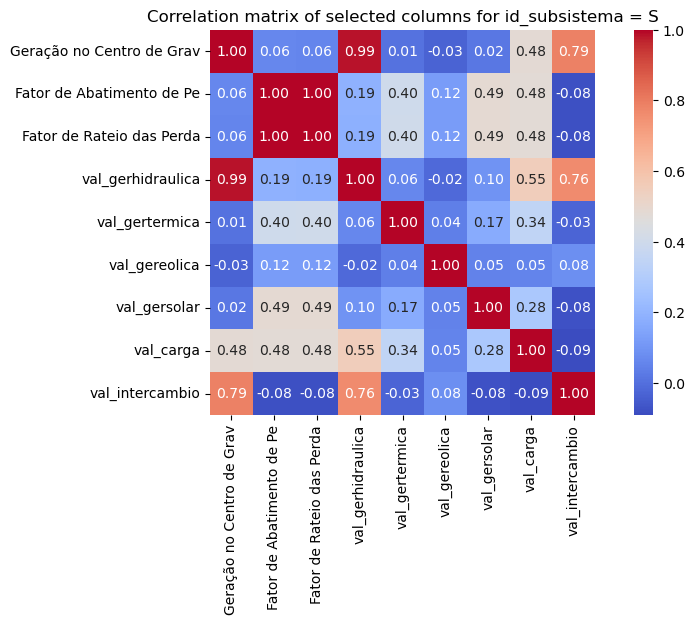

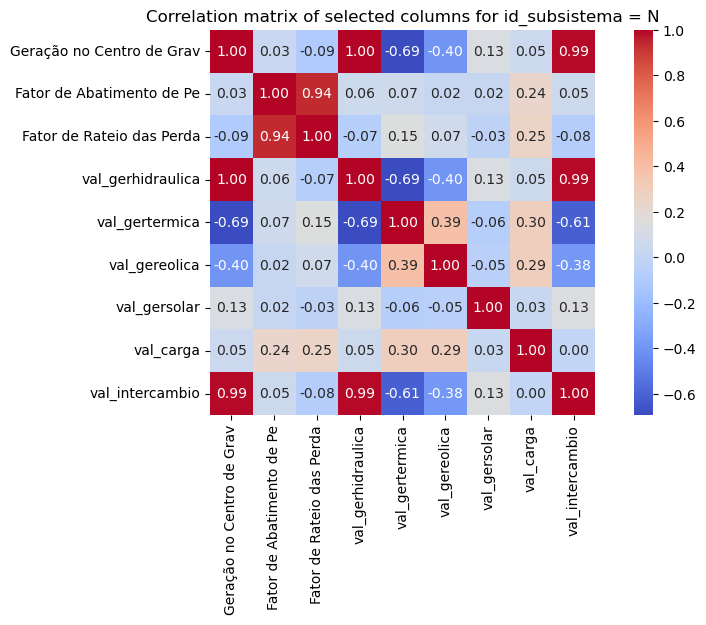

In [30]:
# Get unique values of 'id_subsistema'
ids = df_final['id_subsistema'].unique()

# Loop over unique ids
for id in ids:
    # Subset dataframe for current id
    df_subset = df_final[df_final['id_subsistema'] == id][
                             ['Geração no Centro de Gravidade - MW médios (Gp,j) - MWh',
                              'Fator de Abatimento de Perdas Internas Instantâneas (F_PDIp,j)',
                              'Fator de Rateio das Perdas de Geração (UXP_GLFp,j)*',
                              'din_instante',
                              'id_subsistema',
                              'val_gerhidraulica',
                              'val_gertermica',
                              'val_gereolica',
                              'val_gersolar',
                              'val_carga',
                              'val_intercambio']
                             ]
    
    df_subset = df_subset.groupby(['din_instante']).sum().reset_index()
    
    # Truncate column names to the first 25 characters
    df_subset.columns = [col[:25] for col in df_subset.columns]

    # Calculate the correlation matrix
    corr = df_subset.corr()

    # Plot the correlation matrix
    plt.figure(figsize=(10,5))
    sns.heatmap(corr, annot=True, fmt=".2f", cmap='coolwarm', square=True)
    plt.title(f'Correlation matrix of selected columns for id_subsistema = {id}')
    plt.show()

nada concluído, porém os comportamentos dos subsistemas é diferente.

### Terceiro Merge - cmo-semi-horario

- balanco-programacao-diaria só possui dados de 2023, logo não da para fazer merge com os dados da ccee.
- capacidade-geracao são dados sobre a capacidade de geração das usinas, dados mais atualizados são de 2011, não farei o merge por enquanto.
- pacidade-transformacao possui uma situação parecida com capacidade de geração.
- carga energia possui dados somente de 2020 pra frente, o merge entre esses dados e da ccee seriam pobres.
- carga mensal possui uma situação semelhante.
- cmo semanal pode ser feito através do cmo semi horário, vou deixar o merge deles para ser discutido no futuro.

In [31]:
dados_ons = pd.read_csv(ons_merged_data_path / 'cmo-semi-horario/cmo-semi-horario.csv', 
                                            sep=',')
dados_ons

din_instante     cmo id_subsistema
0       17/04/2018 00:00:00  154,51            NE
1       18/04/2018 00:00:00  151,46            NE
2       19/04/2018 00:00:00    0,04            NE
3       20/04/2018 00:00:00  110,13            NE
4       21/04/2018 00:00:00  129,45            NE
...                     ...     ...           ...
364219  10/08/2023 23:30:00       0            SE
364220  11/08/2023 23:30:00       0            SE
364221  12/08/2023 23:30:00       0            SE
364222  13/08/2023 23:30:00       0            SE
364223  14/08/2023 23:30:00       0            SE

[364224 rows x 3 columns]

In [32]:
dados_ons['din_instante'] = pd.to_datetime(dados_ons['din_instante'])

#dados_ons['din_instante'] = dados_ons['din_instante'].dt.floor('H')

# now group by the rounded date and 'id' and perform the sum
#result_df = dados_ons.groupby(['id_subsistema', 'din_instante']).sum().reset_index()

In [33]:
df_final = pd.merge(df_ccee,
                    dados_ons,
                    on=['din_instante', 'id_subsistema'],
                    how='left')
df_final

Cód. Parcela - Usina Sigla Parcela - Usina           Fonte  \
0                          201                FURNAS      Hidráulica   
1                          201                FURNAS      Hidráulica   
2                          201                FURNAS      Hidráulica   
3                          201                FURNAS      Hidráulica   
4                          201                FURNAS      Hidráulica   
...                        ...                   ...             ...   
14360371                946192      SPE JACUTINGA SA  Hidráulica CGH   
14360372                946192      SPE JACUTINGA SA  Hidráulica CGH   
14360373                946192      SPE JACUTINGA SA  Hidráulica CGH   
14360374                946192      SPE JACUTINGA SA  Hidráulica CGH   
14360375                946192      SPE JACUTINGA SA  Hidráulica CGH   

         Submercado  Geração no Centro de Gravidade - MW médios (Gp,j) - MWh  \
0           SUDESTE                                         105.752205         
1           SUDESTE                                         104.011893         
2           SUDESTE                                         104.191811         
3           SUDESTE                                         104.350077         
4           SUDESTE                                         104.207881         
...             ...                                                ...         
14360371        SUL                                           0.000000         
14360372        SUL                                           0.000000         
14360373        SUL                                           0.000000         
14360374        SUL                                           0.000000         
14360375        SUL                                           0.000000         

          Fator de Abatimento de Perdas Internas Instantâneas (F_PDIp,j)  \
0                                                  0.973220                
1                                                  0.972917                
2                                                  0.971762                
3                                                  0.971061                
4                                                  0.971166                
...                                                     ...                
14360371                                           1.000000                
14360372                                           1.000000                
14360373                                           1.000000                
14360374                                           1.000000                
14360375                                           1.000000                

          Fator de Rateio das Perdas de Geração (UXP_GLFp,j)*  \
0                                                  0.969164     
1                                                  0.968155     
2                                                  0.968905     
3                                                  0.968573     
4                                                  0.968064     
...                                                     ...     
14360371                                           1.000000     
14360372                                           1.000000     
14360373                                           1.000000     
14360374                                           1.000000     
14360375                                           1.000000     

          Deslocamento Hidráulico Energético Preliminar (DH_ENER_PRE_UHp,j)  \
0                                                       0.0                   
1                                                       0.0                   
2                                                       0.0                   
3                                                       0.0                   
4                                                       0.0                   
...             

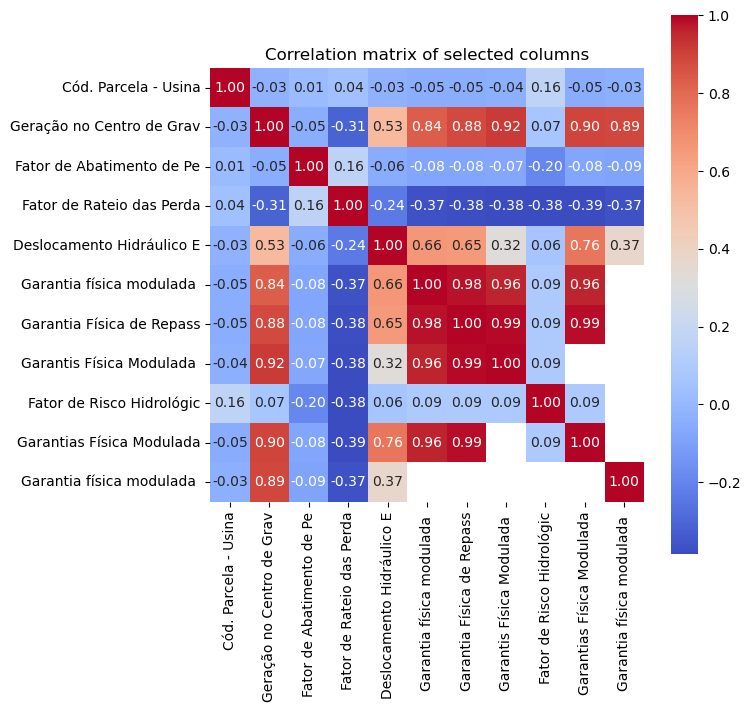

In [34]:
# Truncate column names to the first 25 characters
df_final.columns = [col[:25] for col in df_final.columns]

# Calculate the correlation matrix
corr = df_final.corr()

plt.figure(figsize=(7,7))
sns.heatmap(corr, annot=True, fmt=".2f", cmap='coolwarm', square=True)
plt.title('Correlation matrix of selected columns')
plt.show()

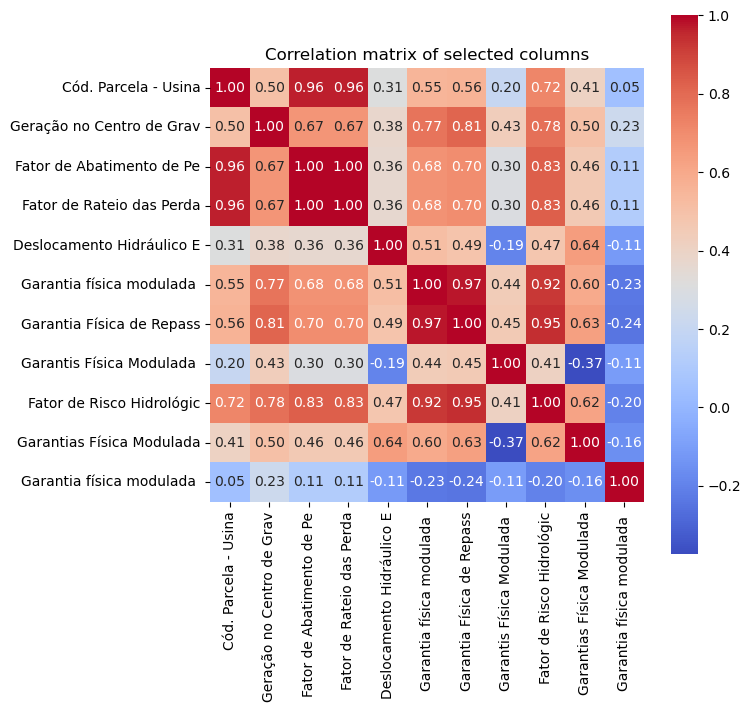

In [35]:
df_subset = df_final.groupby(['id_subsistema', 'din_instante']).sum().reset_index()

# Truncate column names to the first 25 characters
df_subset.columns = [col[:25] for col in df_subset.columns]

# Calculate the correlation matrix
corr = df_subset.corr()

plt.figure(figsize=(7,7))
sns.heatmap(corr, annot=True, fmt=".2f", cmap='coolwarm', square=True)
plt.title('Correlation matrix of selected columns')
plt.show()

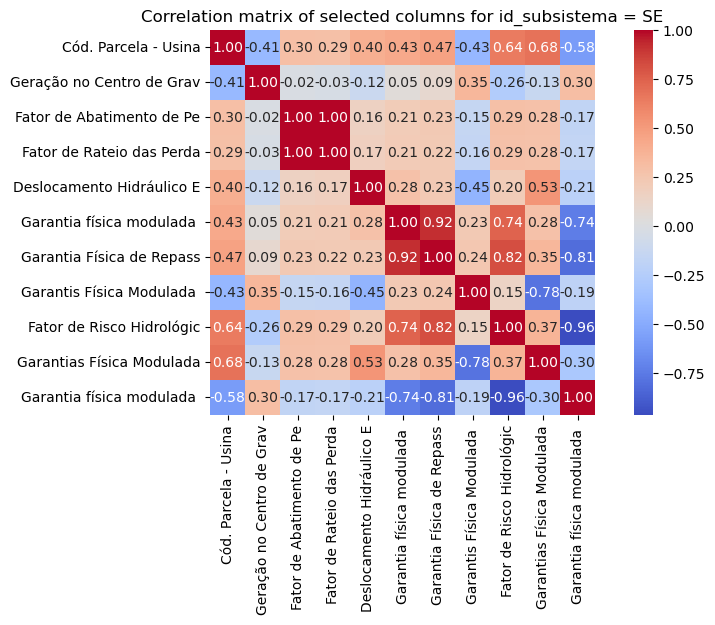

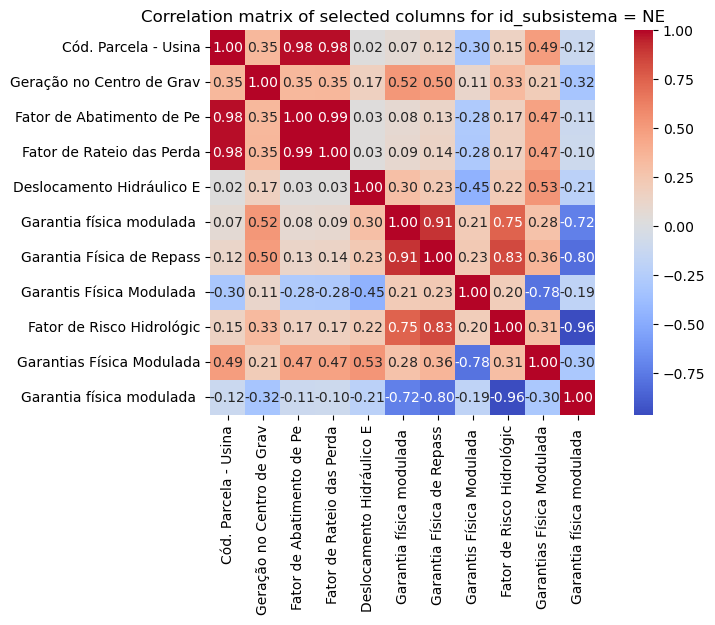

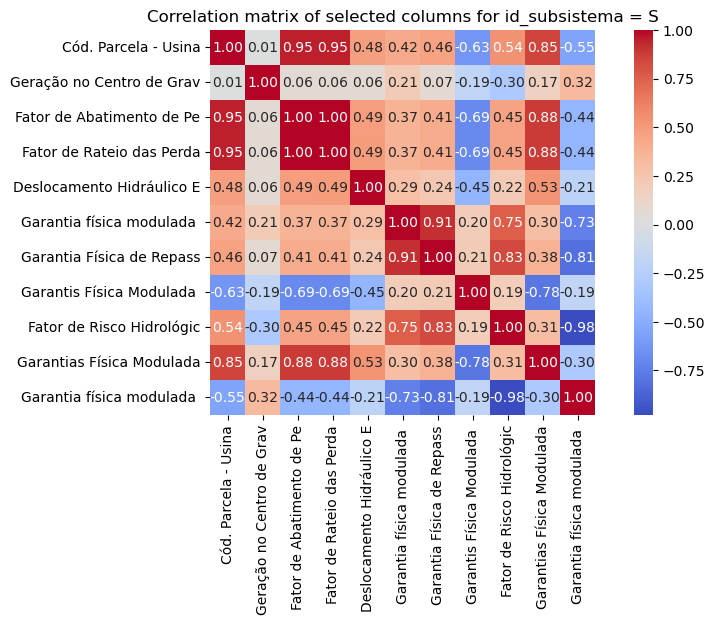

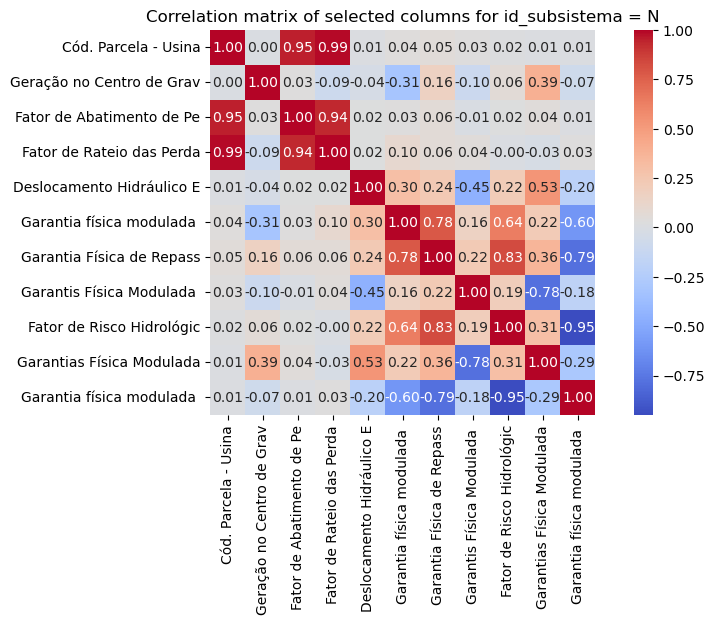

In [36]:
# Get unique values of 'id_subsistema'
ids = df_final['id_subsistema'].unique()

# Loop over unique ids
for id in ids:
    # Subset dataframe for current id
    df_subset = df_final[df_final['id_subsistema'] == id]
    
    df_subset = df_subset.groupby(['din_instante']).sum().reset_index()
    
    # Truncate column names to the first 25 characters
    df_subset.columns = [col[:25] for col in df_subset.columns]

    # Calculate the correlation matrix
    corr = df_subset.corr()

    # Plot the correlation matrix
    plt.figure(figsize=(10,5))
    sns.heatmap(corr, annot=True, fmt=".2f", cmap='coolwarm', square=True)
    plt.title(f'Correlation matrix of selected columns for id_subsistema = {id}')
    plt.show()

### Quarto Merge - curva de carga

In [37]:
dados_ons = pd.read_csv(ons_merged_data_path / 'curva-carga/curva-carga.csv', 
                                            sep=';')
dados_ons.drop('nom_subsistema', axis=1, inplace=True)
dados_ons['din_instante'] = pd.to_datetime(dados_ons['din_instante'])
dados_ons

id_subsistema        din_instante  val_cargaenergiahomwmed
0                  N 2000-01-01 00:00:00                 2373.700
1                 NE 2000-01-01 00:00:00                 5340.200
2                  S 2000-01-01 00:00:00                 5777.000
3                 SE 2000-01-01 00:00:00                21183.000
4                  N 2000-01-01 01:00:00                 2331.600
...              ...                 ...                      ...
823259            SE 2023-06-27 22:00:00                41513.446
823260             N 2023-06-27 23:00:00                 7674.563
823261            NE 2023-06-27 23:00:00                11921.754
823262             S 2023-06-27 23:00:00                10842.681
823263            SE 2023-06-27 23:00:00                38079.549

[823264 rows x 3 columns]

In [38]:
df_final = pd.merge(df_ccee,
                    dados_ons,
                    on=['din_instante', 'id_subsistema'],
                    how='left')
df_final

Cód. Parcela - Usina Sigla Parcela - Usina           Fonte  \
0                          201                FURNAS      Hidráulica   
1                          201                FURNAS      Hidráulica   
2                          201                FURNAS      Hidráulica   
3                          201                FURNAS      Hidráulica   
4                          201                FURNAS      Hidráulica   
...                        ...                   ...             ...   
14360371                946192      SPE JACUTINGA SA  Hidráulica CGH   
14360372                946192      SPE JACUTINGA SA  Hidráulica CGH   
14360373                946192      SPE JACUTINGA SA  Hidráulica CGH   
14360374                946192      SPE JACUTINGA SA  Hidráulica CGH   
14360375                946192      SPE JACUTINGA SA  Hidráulica CGH   

         Submercado  Geração no Centro de Gravidade - MW médios (Gp,j) - MWh  \
0           SUDESTE                                         105.752205         
1           SUDESTE                                         104.011893         
2           SUDESTE                                         104.191811         
3           SUDESTE                                         104.350077         
4           SUDESTE                                         104.207881         
...             ...                                                ...         
14360371        SUL                                           0.000000         
14360372        SUL                                           0.000000         
14360373        SUL                                           0.000000         
14360374        SUL                                           0.000000         
14360375        SUL                                           0.000000         

          Fator de Abatimento de Perdas Internas Instantâneas (F_PDIp,j)  \
0                                                  0.973220                
1                                                  0.972917                
2                                                  0.971762                
3                                                  0.971061                
4                                                  0.971166                
...                                                     ...                
14360371                                           1.000000                
14360372                                           1.000000                
14360373                                           1.000000                
14360374                                           1.000000                
14360375                                           1.000000                

          Fator de Rateio das Perdas de Geração (UXP_GLFp,j)*  \
0                                                  0.969164     
1                                                  0.968155     
2                                                  0.968905     
3                                                  0.968573     
4                                                  0.968064     
...                                                     ...     
14360371                                           1.000000     
14360372                                           1.000000     
14360373                                           1.000000     
14360374                                           1.000000     
14360375                                           1.000000     

          Deslocamento Hidráulico Energético Preliminar (DH_ENER_PRE_UHp,j)  \
0                                                       0.0                   
1                                                       0.0                   
2                                                       0.0                   
3                                                       0.0                   
4                                                       0.0                   
...             

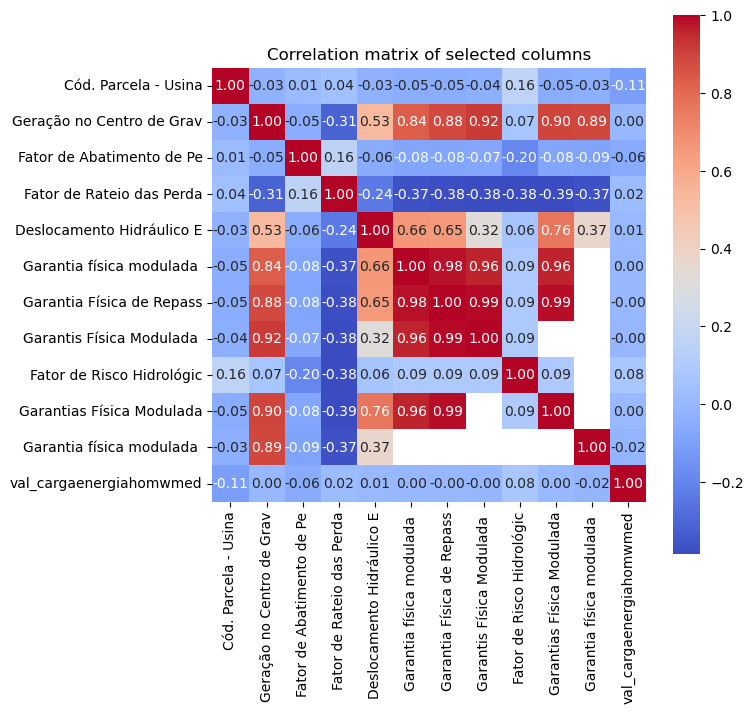

In [39]:
# Truncate column names to the first 25 characters
df_final.columns = [col[:25] for col in df_final.columns]

# Calculate the correlation matrix
corr = df_final.corr()

plt.figure(figsize=(7,7))
sns.heatmap(corr, annot=True, fmt=".2f", cmap='coolwarm', square=True)
plt.title('Correlation matrix of selected columns')
plt.show()

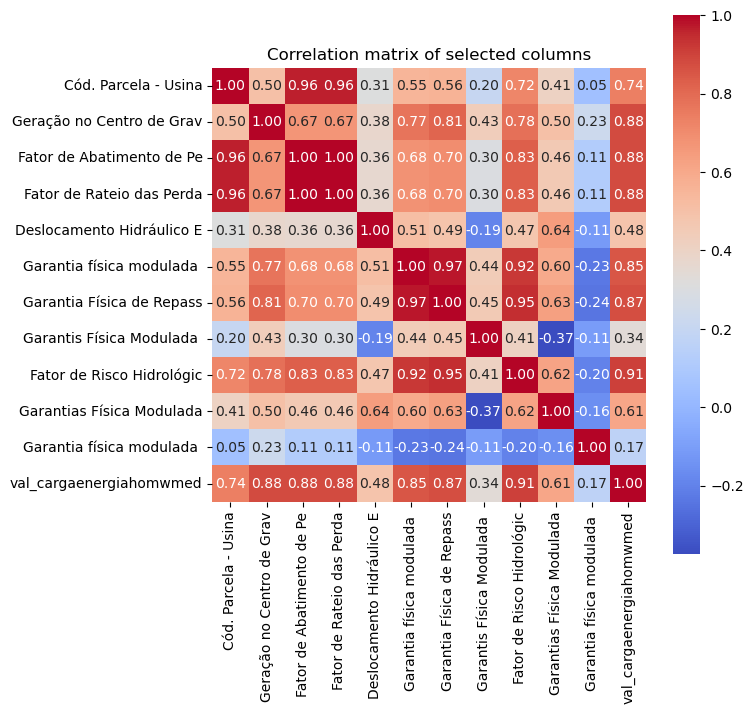

In [40]:
df_subset = df_final.groupby(['id_subsistema', 'din_instante']).sum().reset_index()

# Truncate column names to the first 25 characters
df_subset.columns = [col[:25] for col in df_subset.columns]

# Calculate the correlation matrix
corr = df_subset.corr()

plt.figure(figsize=(7,7))
sns.heatmap(corr, annot=True, fmt=".2f", cmap='coolwarm', square=True)
plt.title('Correlation matrix of selected columns')
plt.show()

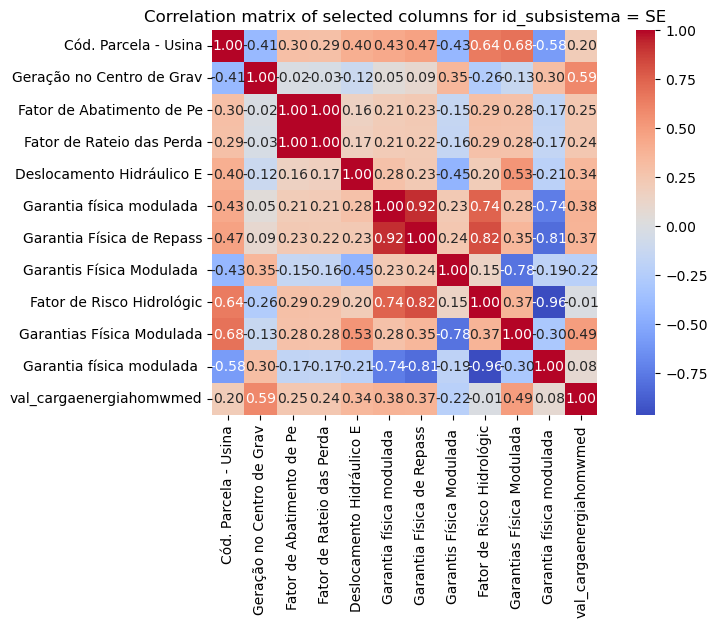

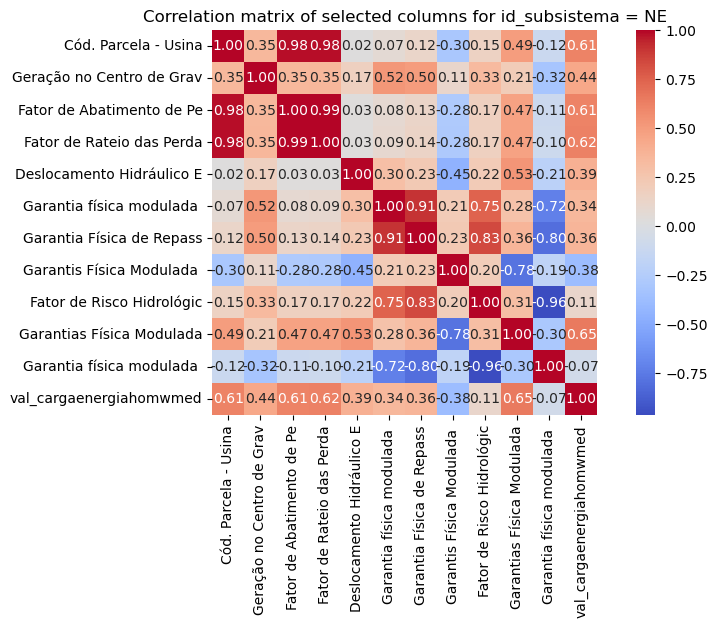

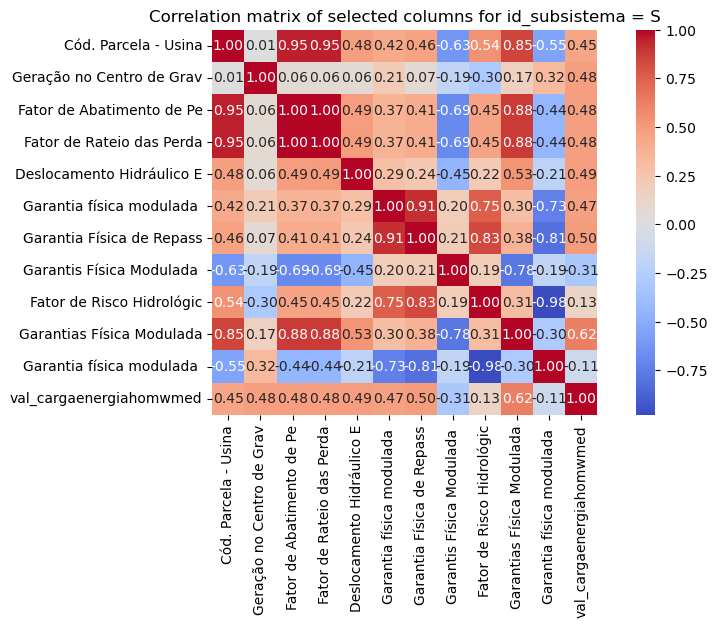

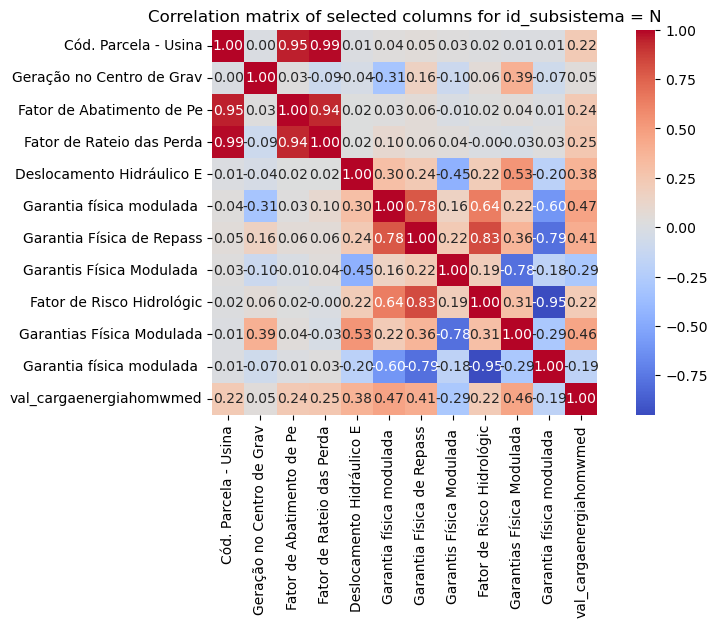

In [41]:
# Get unique values of 'id_subsistema'
ids = df_final['id_subsistema'].unique()

# Loop over unique ids
for id in ids:
    # Subset dataframe for current id
    df_subset = df_final[df_final['id_subsistema'] == id]
    
    df_subset = df_subset.groupby(['din_instante']).sum().reset_index()
    
    # Truncate column names to the first 25 characters
    df_subset.columns = [col[:25] for col in df_subset.columns]

    # Calculate the correlation matrix
    corr = df_subset.corr()

    # Plot the correlation matrix
    plt.figure(figsize=(10,5))
    sns.heatmap(corr, annot=True, fmt=".2f", cmap='coolwarm', square=True)
    plt.title(f'Correlation matrix of selected columns for id_subsistema = {id}')
    plt.show()

### Quinto Merge - dados-hidrologicos-res

- cvu-usitermica contém dados de 2020 para frente, seriam perdidos 2 anos ao fazer o merge

In [42]:
dados_ons = pd.read_csv(ons_merged_data_path / 'dados-hidrologicos-res/dados-hidrologicos-res.csv', 
                                            sep=';')
dados_ons.drop('nom_subsistema', axis=1, inplace=True)
dados_ons['din_instante'] = pd.to_datetime(dados_ons['din_instante'])
dados_ons

id_subsistema         tip_reservatorio      nom_bacia nom_ree  \
0                  NE                Fio dagua  JEQUITINHONHA     NaN   
1                  NE  ReservatÃ³rio com Usina      PARAGUACU     NaN   
2                  NE  ReservatÃ³rio com Usina       PARNAIBA     NaN   
3                  NE  ReservatÃ³rio com Usina  SAO FRANCISCO     NaN   
4                  NE  ReservatÃ³rio com Usina  SAO FRANCISCO     NaN   
...               ...                      ...            ...     ...   
1353276             S                Fio dagua        URUGUAI     SUL   
1353277             S                Fio dagua        URUGUAI     SUL   
1353278             S  ReservatÃ³rio com Usina        URUGUAI     SUL   
1353279             S                Fio dagua        URUGUAI     SUL   
1353280             S                Fio dagua        URUGUAI     SUL   

        nom_reservatorio  num_ordemcs  cod_usina din_instante  \
0                ITAPEBI           67      154.0   2000-01-01   
1        PEDRA DO CAVALO          104      189.0   2000-01-01   
2         BOA ESPERANÃA          105      190.0   2000-01-01   
3             SOBRADINHO          175      169.0   2000-01-01   
4              ITAPARICA          176      172.0   2000-01-01   
...                  ...          ...        ...          ...   
1353276       MONJOLINHO          167       94.0   2023-06-28   
1353277      FOZ CHAPECO          168      103.0   2023-06-28   
1353278    QUEBRA QUEIXO          169       95.0   2023-06-28   
1353279         SAO JOSE          170      101.0   2023-06-28   
1353280   PASSO SAO JOAO          171      102.0   2023-06-28   

         val_nivelmontante  val_niveljusante  ...  val_vazaoturbinada  \
0                      NaN               NaN  ...                 NaN   
1               115.200000               NaN  ...                 NaN   
2               301.590000        259.570000  ...               417.0   
3               384.420000               NaN  ...                 NaN   
4               301.130000               NaN  ...                 NaN   
...                    ...               ...  ...                 ...   
1353276         326.529999        265.049988  ...                93.0   
1353277         264.959991        212.850006  ...              1068.0   
1353278         548.919983        426.630005  ...                76.0   
1353279         154.399994        131.250000  ...               154.0   
1353280         127.839996         98.000000  ...               153.0   

         val_vazaovertida  val_vazaooutrasestruturas  val_vazaodefluente  \
0                     NaN                        NaN                 NaN   
1                     NaN                        NaN               508.0   
2                     0.0                        NaN               417.0   
3                     0.0                        NaN              1615.0   
4                     0.0                        NaN              1670.0   
...                   ...                        ...                 ...   
1353276               0.0                        0.0                93.0   
1353277             564.0                        0.0              1632.0   
1353278              22.0                        1.0                99.0   
1353279               0.0                        0.0               154.0   
1353280              28.0                        0.0               181.0   

         val_vazaotransferida  val_vazaonatural  val_vazaoartificial  \
0                         NaN        350.720000                  NaN   
1                         NaN        422.020000                  NaN   
2                         NaN        814.640000                  NaN   
3                         NaN       3258.000000                  NaN   
4                         NaN       3527.050000                  NaN   
...                       ...               ...                  ...   
1353276                   0.0        156.184006         

In [43]:
dados_ons.drop(['tip_reservatorio',
            'nom_bacia',
            'nom_ree',
            'nom_reservatorio',
            'cod_usina'], axis=1, inplace=True)

In [44]:
result_df = dados_ons.groupby(['id_subsistema', 'din_instante']).sum().reset_index()

df_final = pd.merge(df_ccee,
                    result_df,
                    on=['din_instante', 'id_subsistema'],
                    how='left')
df_final

Cód. Parcela - Usina Sigla Parcela - Usina           Fonte  \
0                          201                FURNAS      Hidráulica   
1                          201                FURNAS      Hidráulica   
2                          201                FURNAS      Hidráulica   
3                          201                FURNAS      Hidráulica   
4                          201                FURNAS      Hidráulica   
...                        ...                   ...             ...   
14360371                946192      SPE JACUTINGA SA  Hidráulica CGH   
14360372                946192      SPE JACUTINGA SA  Hidráulica CGH   
14360373                946192      SPE JACUTINGA SA  Hidráulica CGH   
14360374                946192      SPE JACUTINGA SA  Hidráulica CGH   
14360375                946192      SPE JACUTINGA SA  Hidráulica CGH   

         Submercado  Geração no Centro de Gravidade - MW médios (Gp,j) - MWh  \
0           SUDESTE                                         105.752205         
1           SUDESTE                                         104.011893         
2           SUDESTE                                         104.191811         
3           SUDESTE                                         104.350077         
4           SUDESTE                                         104.207881         
...             ...                                                ...         
14360371        SUL                                           0.000000         
14360372        SUL                                           0.000000         
14360373        SUL                                           0.000000         
14360374        SUL                                           0.000000         
14360375        SUL                                           0.000000         

          Fator de Abatimento de Perdas Internas Instantâneas (F_PDIp,j)  \
0                                                  0.973220                
1                                                  0.972917                
2                                                  0.971762                
3                                                  0.971061                
4                                                  0.971166                
...                                                     ...                
14360371                                           1.000000                
14360372                                           1.000000                
14360373                                           1.000000                
14360374                                           1.000000                
14360375                                           1.000000                

          Fator de Rateio das Perdas de Geração (UXP_GLFp,j)*  \
0                                                  0.969164     
1                                                  0.968155     
2                                                  0.968905     
3                                                  0.968573     
4                                                  0.968064     
...                                                     ...     
14360371                                           1.000000     
14360372                                           1.000000     
14360373                                           1.000000     
14360374                                           1.000000     
14360375                                           1.000000     

          Deslocamento Hidráulico Energético Preliminar (DH_ENER_PRE_UHp,j)  \
0                                                       0.0                   
1                                                       0.0                   
2                                                       0.0                   
3                                                       0.0                   
4                                                       0.0                   
...             

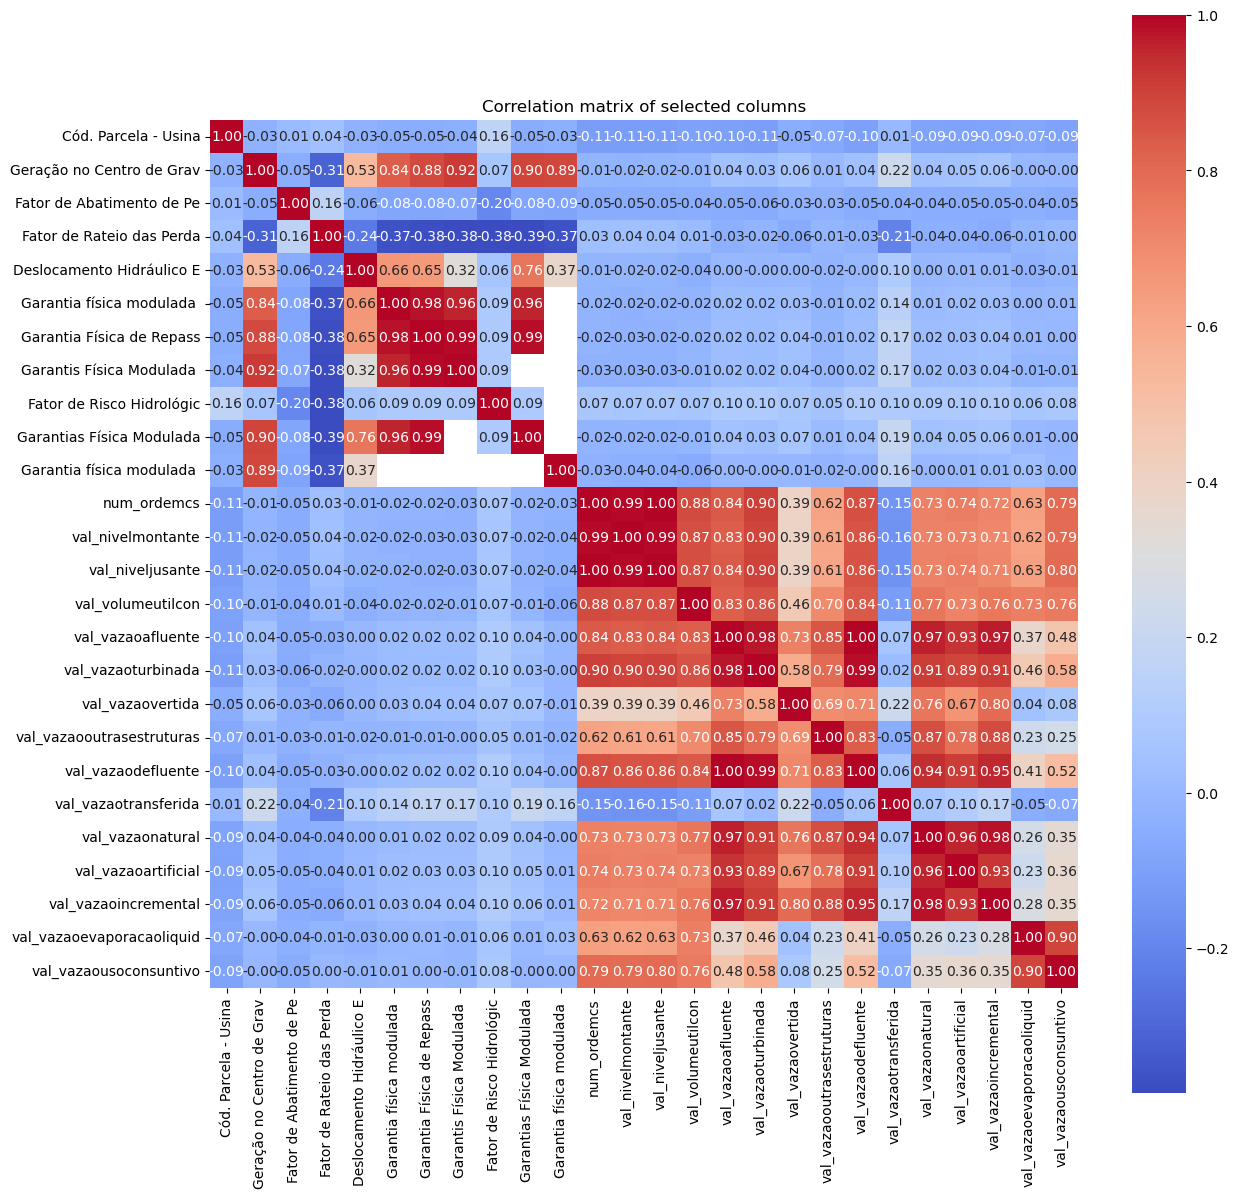

In [45]:
# Truncate column names to the first 25 characters
df_final.columns = [col[:25] for col in df_final.columns]

# Calculate the correlation matrix
corr = df_final.corr()

plt.figure(figsize=(14,14))
sns.heatmap(corr, annot=True, fmt=".2f", cmap='coolwarm', square=True)
plt.title('Correlation matrix of selected columns')
plt.show()

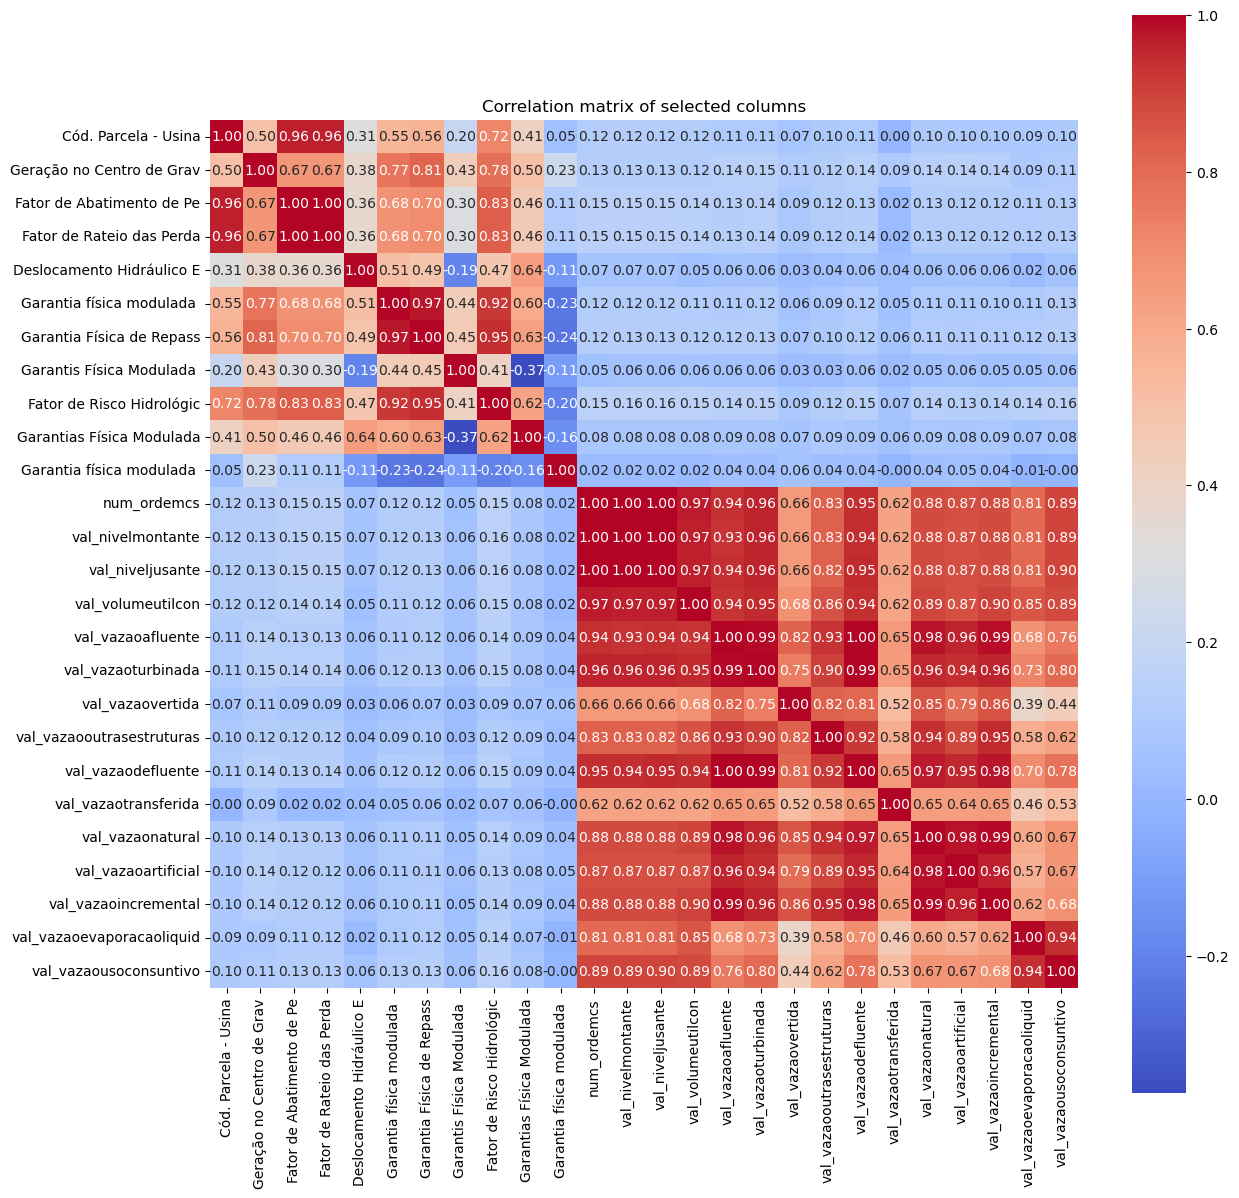

In [46]:
df_subset = df_final.groupby(['id_subsistema', 'din_instante']).sum().reset_index()

# Truncate column names to the first 25 characters
df_subset.columns = [col[:25] for col in df_subset.columns]

# Calculate the correlation matrix
corr = df_subset.corr()

plt.figure(figsize=(14,14))
sns.heatmap(corr, annot=True, fmt=".2f", cmap='coolwarm', square=True)
plt.title('Correlation matrix of selected columns')
plt.show()

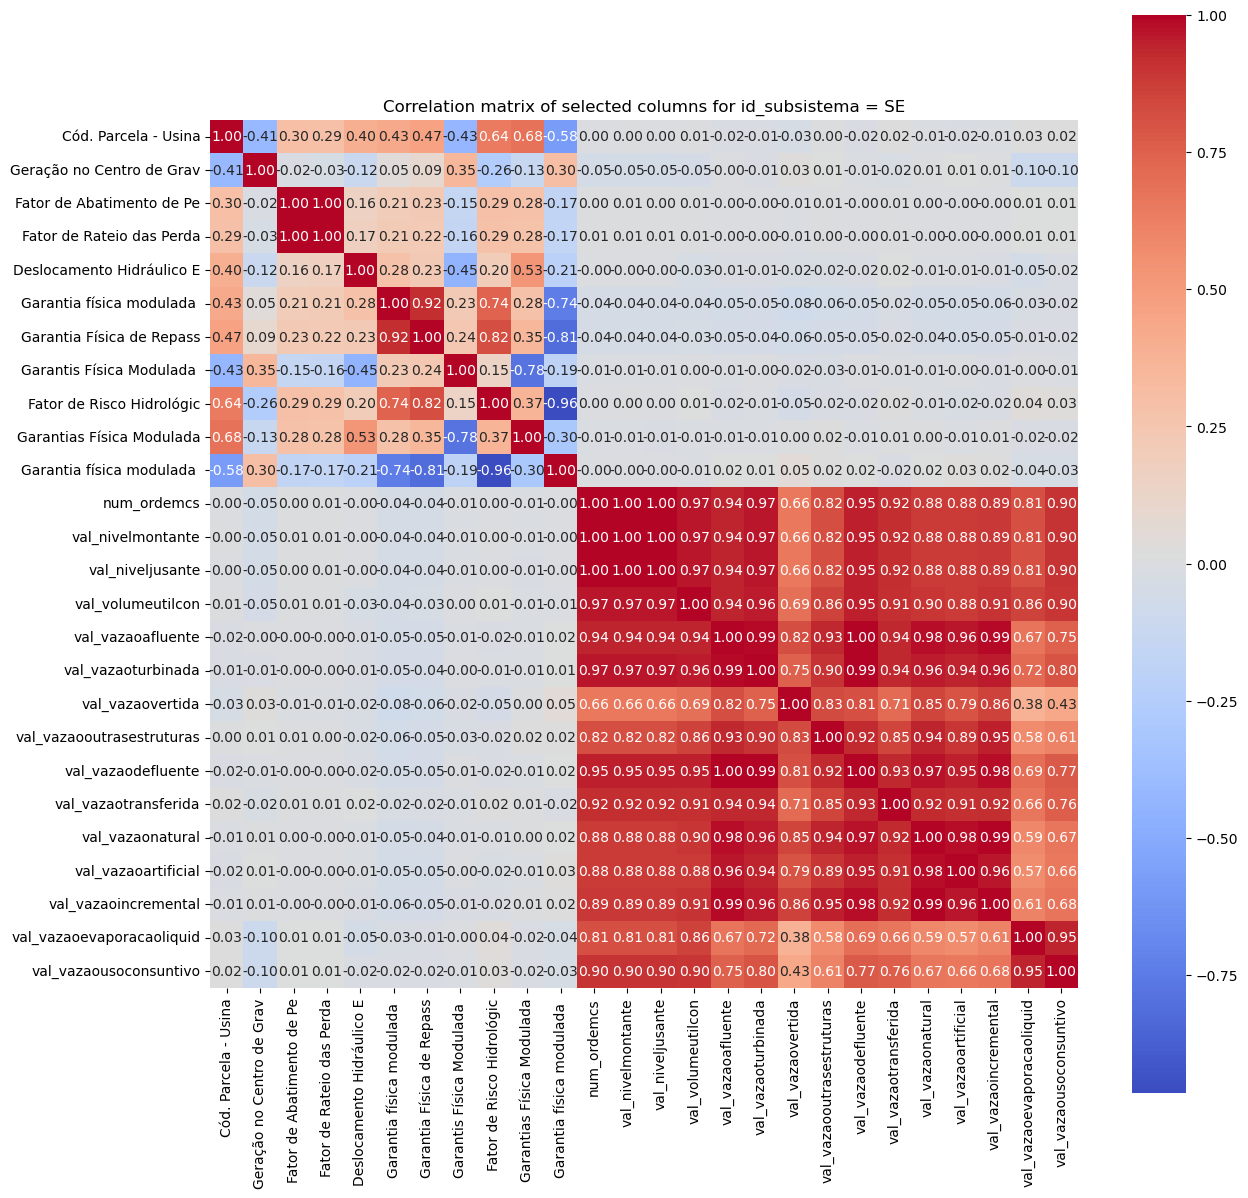

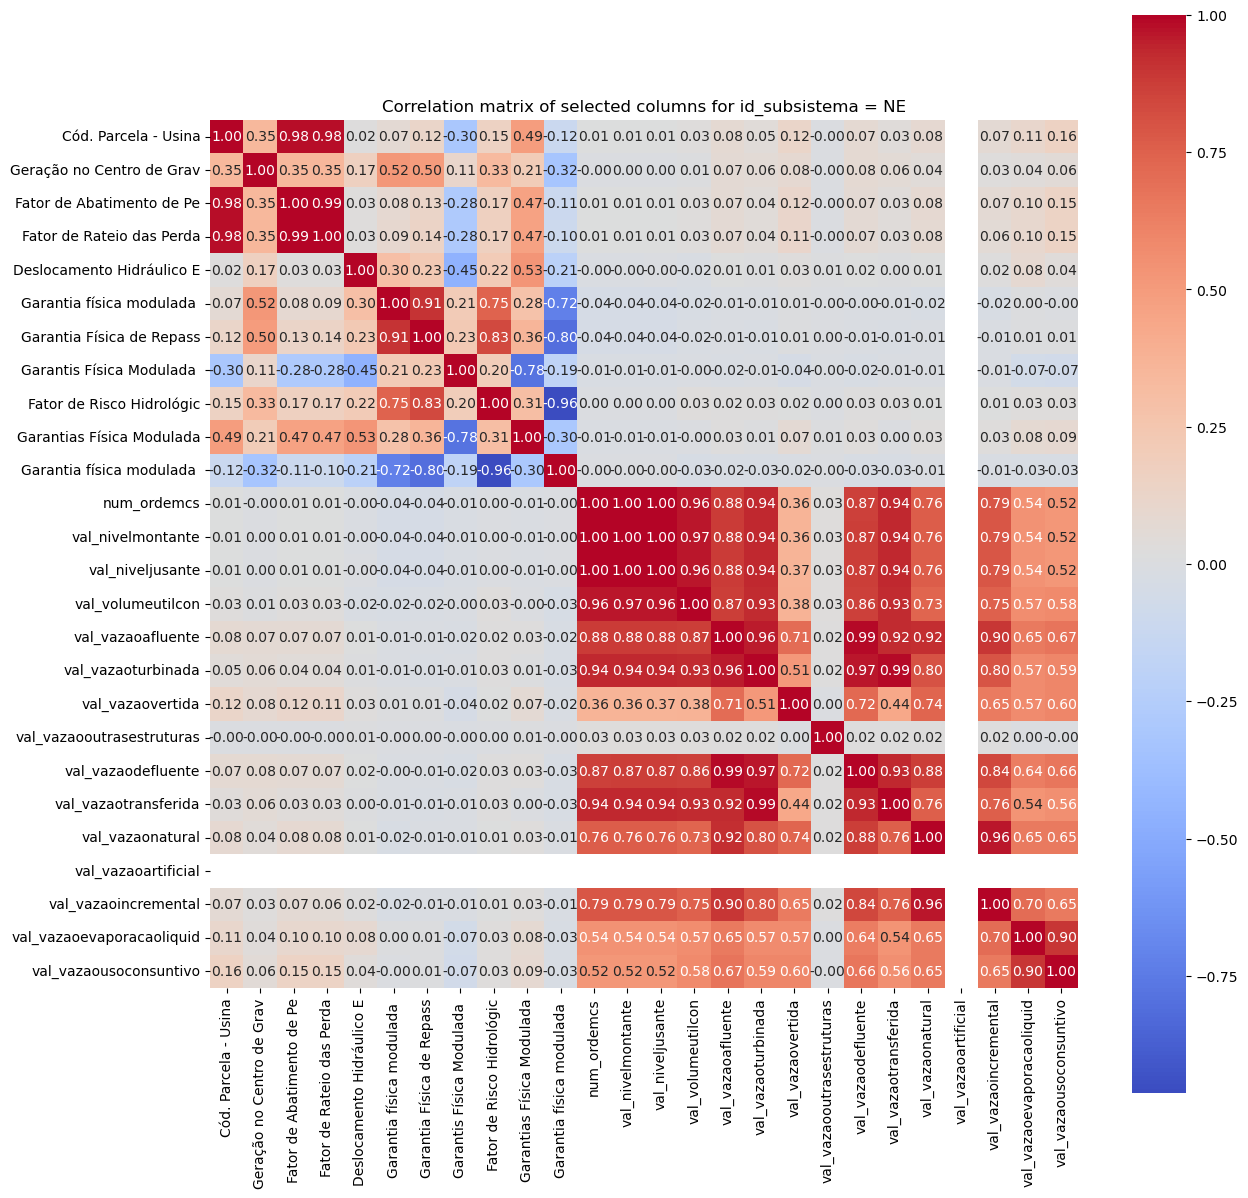

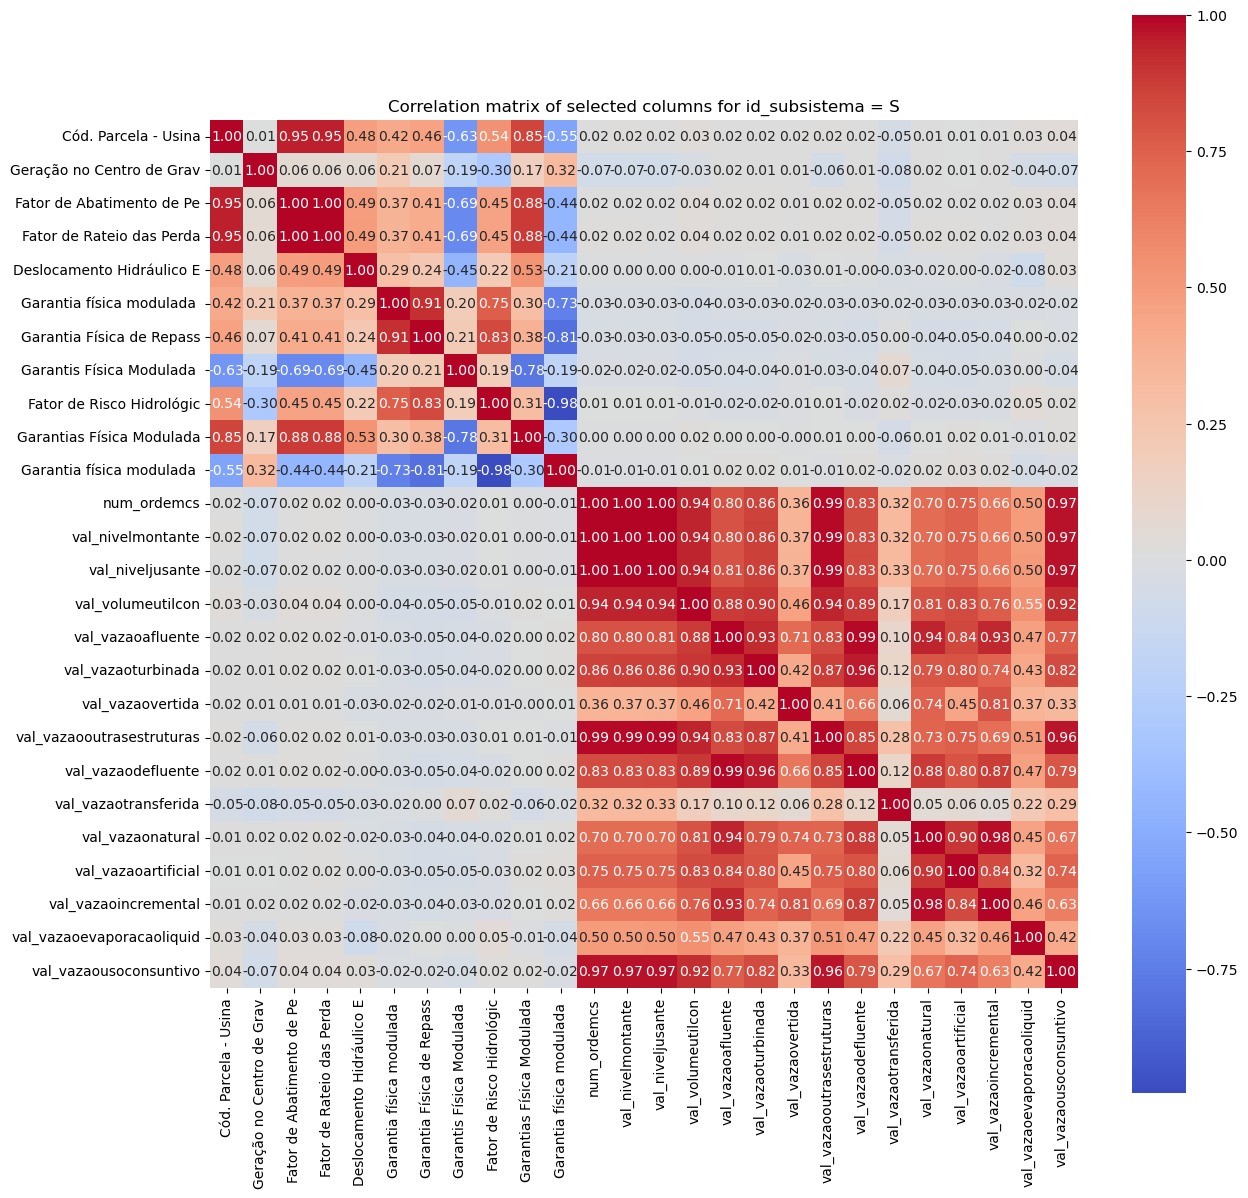

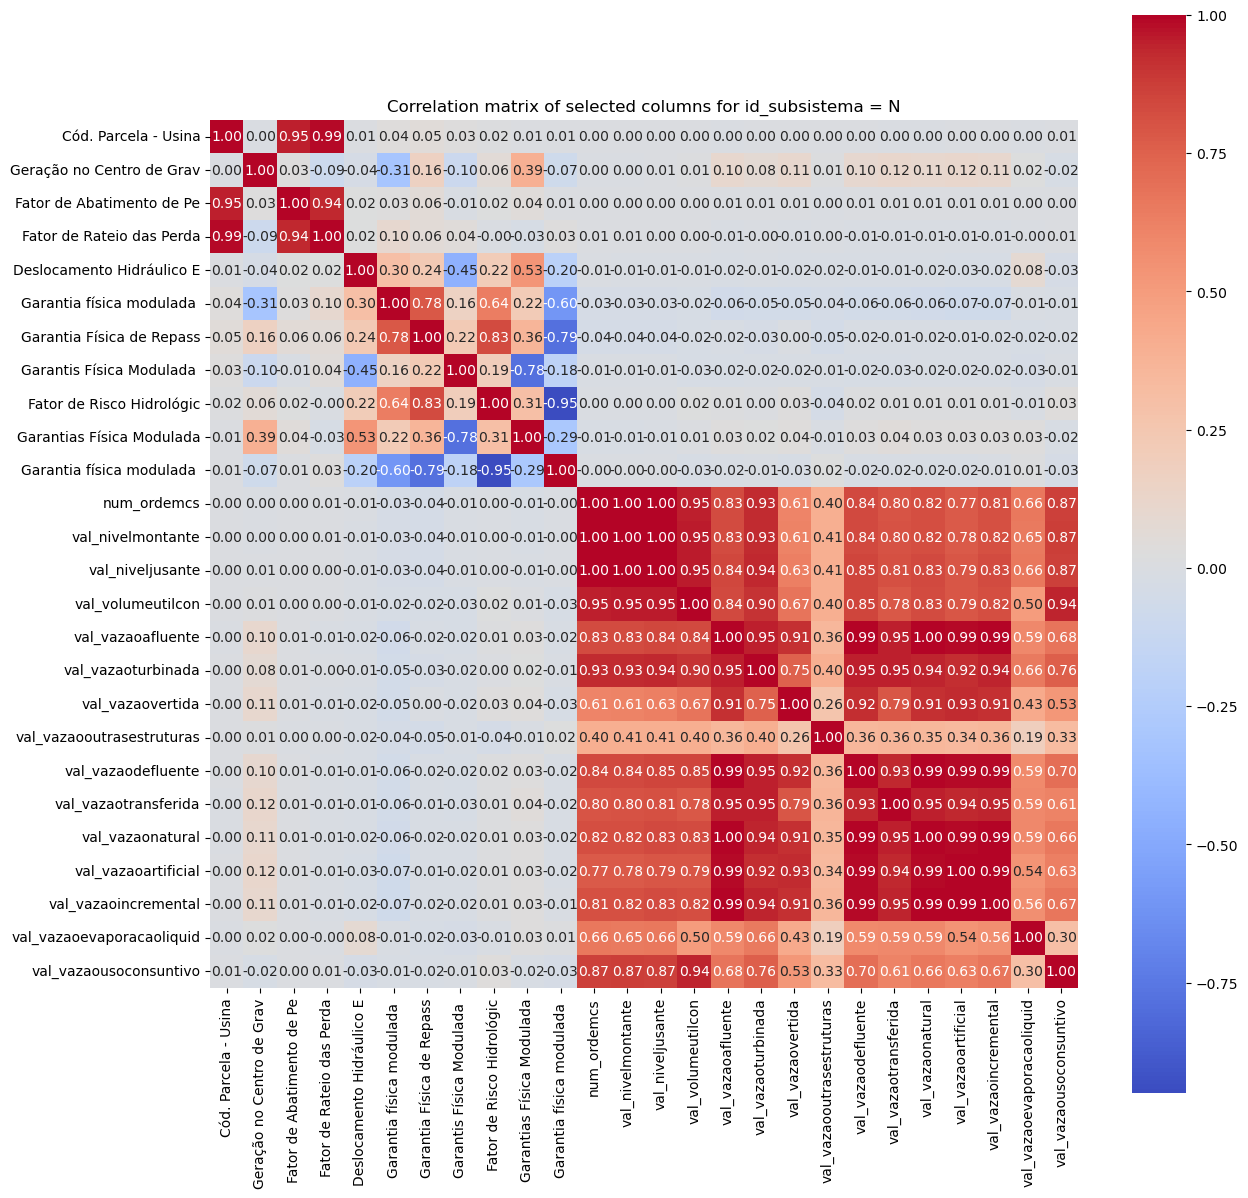

In [47]:
# Get unique values of 'id_subsistema'
ids = df_final['id_subsistema'].unique()

# Loop over unique ids
for id in ids:
    # Subset dataframe for current id
    df_subset = df_final[df_final['id_subsistema'] == id]
    
    df_subset = df_subset.groupby(['din_instante']).sum().reset_index()
    
    # Truncate column names to the first 25 characters
    df_subset.columns = [col[:25] for col in df_subset.columns]

    # Calculate the correlation matrix
    corr = df_subset.corr()

    # Plot the correlation matrix
    plt.figure(figsize=(14,14))
    sns.heatmap(corr, annot=True, fmt=".2f", cmap='coolwarm', square=True)
    plt.title(f'Correlation matrix of selected columns for id_subsistema = {id}')
    plt.show()

### Sexto Merge - ear-diario-por-subsistema

como estou visando fazer o merge por subsistema vou usar o ear diario por subsistema, tirar dúvida se engloba reservatórios e bacias.

In [48]:
dados_ons = pd.read_csv(ons_merged_data_path / 'ear-diario-por-subsistema/ear-diario-por-subsistema.csv', 
                                            sep=';')
dados_ons.drop('nom_subsistema', axis=1, inplace=True)
dados_ons.rename(columns={'ear_data':'din_instante'},inplace=True)
dados_ons['din_instante'] = pd.to_datetime(dados_ons['din_instante'])
dados_ons

df_final = pd.merge(df_ccee,
                    dados_ons,
                    on=['din_instante', 'id_subsistema'],
                    how='left')
df_final

Cód. Parcela - Usina Sigla Parcela - Usina           Fonte  \
0                          201                FURNAS      Hidráulica   
1                          201                FURNAS      Hidráulica   
2                          201                FURNAS      Hidráulica   
3                          201                FURNAS      Hidráulica   
4                          201                FURNAS      Hidráulica   
...                        ...                   ...             ...   
14360371                946192      SPE JACUTINGA SA  Hidráulica CGH   
14360372                946192      SPE JACUTINGA SA  Hidráulica CGH   
14360373                946192      SPE JACUTINGA SA  Hidráulica CGH   
14360374                946192      SPE JACUTINGA SA  Hidráulica CGH   
14360375                946192      SPE JACUTINGA SA  Hidráulica CGH   

         Submercado  Geração no Centro de Gravidade - MW médios (Gp,j) - MWh  \
0           SUDESTE                                         105.752205         
1           SUDESTE                                         104.011893         
2           SUDESTE                                         104.191811         
3           SUDESTE                                         104.350077         
4           SUDESTE                                         104.207881         
...             ...                                                ...         
14360371        SUL                                           0.000000         
14360372        SUL                                           0.000000         
14360373        SUL                                           0.000000         
14360374        SUL                                           0.000000         
14360375        SUL                                           0.000000         

          Fator de Abatimento de Perdas Internas Instantâneas (F_PDIp,j)  \
0                                                  0.973220                
1                                                  0.972917                
2                                                  0.971762                
3                                                  0.971061                
4                                                  0.971166                
...                                                     ...                
14360371                                           1.000000                
14360372                                           1.000000                
14360373                                           1.000000                
14360374                                           1.000000                
14360375                                           1.000000                

          Fator de Rateio das Perdas de Geração (UXP_GLFp,j)*  \
0                                                  0.969164     
1                                                  0.968155     
2                                                  0.968905     
3                                                  0.968573     
4                                                  0.968064     
...                                                     ...     
14360371                                           1.000000     
14360372                                           1.000000     
14360373                                           1.000000     
14360374                                           1.000000     
14360375                                           1.000000     

          Deslocamento Hidráulico Energético Preliminar (DH_ENER_PRE_UHp,j)  \
0                                                       0.0                   
1                                                       0.0                   
2                                                       0.0                   
3                                                       0.0                   
4                                                       0.0                   
...             

### Sétimo Merge - ena-diario-por-subsistema

In [49]:
dados_ons = pd.read_csv(ons_merged_data_path / 'ena-diario-por-subsistema/ena-diario-por-subsistema.csv', 
                                            sep=';')
dados_ons.drop('nom_subsistema', axis=1, inplace=True)
dados_ons.rename(columns={'ena_data':'din_instante'},inplace=True)
dados_ons['din_instante'] = pd.to_datetime(dados_ons['din_instante'])
dados_ons

df_final = pd.merge(df_ccee,
                    dados_ons,
                    on=['din_instante', 'id_subsistema'],
                    how='left')
df_final

Cód. Parcela - Usina Sigla Parcela - Usina           Fonte  \
0                          201                FURNAS      Hidráulica   
1                          201                FURNAS      Hidráulica   
2                          201                FURNAS      Hidráulica   
3                          201                FURNAS      Hidráulica   
4                          201                FURNAS      Hidráulica   
...                        ...                   ...             ...   
14360371                946192      SPE JACUTINGA SA  Hidráulica CGH   
14360372                946192      SPE JACUTINGA SA  Hidráulica CGH   
14360373                946192      SPE JACUTINGA SA  Hidráulica CGH   
14360374                946192      SPE JACUTINGA SA  Hidráulica CGH   
14360375                946192      SPE JACUTINGA SA  Hidráulica CGH   

         Submercado  Geração no Centro de Gravidade - MW médios (Gp,j) - MWh  \
0           SUDESTE                                         105.752205         
1           SUDESTE                                         104.011893         
2           SUDESTE                                         104.191811         
3           SUDESTE                                         104.350077         
4           SUDESTE                                         104.207881         
...             ...                                                ...         
14360371        SUL                                           0.000000         
14360372        SUL                                           0.000000         
14360373        SUL                                           0.000000         
14360374        SUL                                           0.000000         
14360375        SUL                                           0.000000         

          Fator de Abatimento de Perdas Internas Instantâneas (F_PDIp,j)  \
0                                                  0.973220                
1                                                  0.972917                
2                                                  0.971762                
3                                                  0.971061                
4                                                  0.971166                
...                                                     ...                
14360371                                           1.000000                
14360372                                           1.000000                
14360373                                           1.000000                
14360374                                           1.000000                
14360375                                           1.000000                

          Fator de Rateio das Perdas de Geração (UXP_GLFp,j)*  \
0                                                  0.969164     
1                                                  0.968155     
2                                                  0.968905     
3                                                  0.968573     
4                                                  0.968064     
...                                                     ...     
14360371                                           1.000000     
14360372                                           1.000000     
14360373                                           1.000000     
14360374                                           1.000000     
14360375                                           1.000000     

          Deslocamento Hidráulico Energético Preliminar (DH_ENER_PRE_UHp,j)  \
0                                                       0.0                   
1                                                       0.0                   
2                                                       0.0                   
3                                                       0.0                   
4                                                       0.0                   
...             

### Oitovo Merge - energia-vertida-turbinavel

In [50]:
dados_ons = pd.read_csv(ons_merged_data_path / 'energia-vertida-turbinavel/energia-vertida-turbinavel.csv', 
                                            sep=';')
dados_ons.drop('nom_subsistema', axis=1, inplace=True)
dados_ons.rename(columns={'ena_data':'din_instante'},inplace=True)
dados_ons['din_instante'] = pd.to_datetime(dados_ons['din_instante'])
dados_ons

dados_ons.drop(['nom_bacia',
                'nom_rio',
                'nom_agente',
                'nom_reservatorio',
                'cod_usina'], axis=1, inplace=True)

result_df = dados_ons.groupby(['id_subsistema', 'din_instante']).sum().reset_index()

result_df

id_subsistema        din_instante  val_geracao  val_disponibilidade  \
0                  N 2015-01-01 00:00:00     3310.526             6541.310   
1                  N 2015-01-01 01:00:00     3309.811             6541.310   
2                  N 2015-01-01 02:00:00     2885.636             6541.310   
3                  N 2015-01-01 03:00:00     2406.538             6541.310   
4                  N 2015-01-01 04:00:00     2361.206             6541.310   
...              ...                 ...          ...                  ...   
296619            SE 2023-06-27 19:00:00    34506.889            52945.113   
296620            SE 2023-06-27 20:00:00    33283.029            52945.113   
296621            SE 2023-06-27 21:00:00    32836.718            52945.113   
296622            SE 2023-06-27 22:00:00    30136.818            52945.113   
296623            SE 2023-06-27 23:00:00    26304.851            52945.113   

        val_vazaoturbinada  val_vazaovertida  val_vazaovertidanaoturbinavel  \
0                   8048.0              55.0                            0.0   
1                   7068.0              55.0                            0.0   
2                   6476.0              55.0                            0.0   
3                   6023.0              55.0                            0.0   
4                   5903.0              55.0                            0.0   
...                    ...               ...                            ...   
296619             86964.0             602.0                            5.0   
296620             85479.0             615.0                            5.0   
296621             85325.0             398.0                            5.0   
296622             80277.0             386.0                            5.0   
296623             73170.0             392.0                            5.0   

        val_produtividade  val_folgadegeracao  val_energiavertida  \
0                1.239339            3230.784           10.580346   
1                1.371102            3231.499           12.347563   
2                1.382571            3655.674           12.663051   
3                1.326629            4134.772           12.366651   
4                1.337000            4180.104           12.665223   
...                   ...                 ...                 ...   
296619          59.229693           18466.932          335.560779   
296620          60.506734           19691.298          334.688162   
296621          59.215997           20135.252          220.950584   
296622          58.894179           22834.777          211.011994   
296623          57.698594           26665.466          205.878842   

        val_vazaovertidaturbinavel  val_energiavertidaturbinavel  
0                             55.0                     10.580346  
1                             55.0                     12.347563  
2                             55.0                     12.663051  
3                             55.0                     12.366651  
4                             55.0                     12.665223  
...                            ...                           ...  
296619                       546.0                    308.139188  
296620                       606.0                    330.308336  
296621                       338.0                    192.082090  
296622                       377.0                    206.628864  
296623                       384.0                    202.592277  

[296624 rows x 12 columns]

In [51]:
df_final = pd.merge(df_ccee,
                    result_df,
                    on=['din_instante', 'id_subsistema'],
                    how='left')
df_final

Cód. Parcela - Usina Sigla Parcela - Usina           Fonte  \
0                          201                FURNAS      Hidráulica   
1                          201                FURNAS      Hidráulica   
2                          201                FURNAS      Hidráulica   
3                          201                FURNAS      Hidráulica   
4                          201                FURNAS      Hidráulica   
...                        ...                   ...             ...   
14360371                946192      SPE JACUTINGA SA  Hidráulica CGH   
14360372                946192      SPE JACUTINGA SA  Hidráulica CGH   
14360373                946192      SPE JACUTINGA SA  Hidráulica CGH   
14360374                946192      SPE JACUTINGA SA  Hidráulica CGH   
14360375                946192      SPE JACUTINGA SA  Hidráulica CGH   

         Submercado  Geração no Centro de Gravidade - MW médios (Gp,j) - MWh  \
0           SUDESTE                                         105.752205         
1           SUDESTE                                         104.011893         
2           SUDESTE                                         104.191811         
3           SUDESTE                                         104.350077         
4           SUDESTE                                         104.207881         
...             ...                                                ...         
14360371        SUL                                           0.000000         
14360372        SUL                                           0.000000         
14360373        SUL                                           0.000000         
14360374        SUL                                           0.000000         
14360375        SUL                                           0.000000         

          Fator de Abatimento de Perdas Internas Instantâneas (F_PDIp,j)  \
0                                                  0.973220                
1                                                  0.972917                
2                                                  0.971762                
3                                                  0.971061                
4                                                  0.971166                
...                                                     ...                
14360371                                           1.000000                
14360372                                           1.000000                
14360373                                           1.000000                
14360374                                           1.000000                
14360375                                           1.000000                

          Fator de Rateio das Perdas de Geração (UXP_GLFp,j)*  \
0                                                  0.969164     
1                                                  0.968155     
2                                                  0.968905     
3                                                  0.968573     
4                                                  0.968064     
...                                                     ...     
14360371                                           1.000000     
14360372                                           1.000000     
14360373                                           1.000000     
14360374                                           1.000000     
14360375                                           1.000000     

          Deslocamento Hidráulico Energético Preliminar (DH_ENER_PRE_UHp,j)  \
0                                                       0.0                   
1                                                       0.0                   
2                                                       0.0                   
3                                                       0.0                   
4                                                       0.0                   
...             

### Nono Merge - geracao-termica-despacho-2

- equipamento-controle-reativo - São dados de equipamentos, acredito não ser relevante para o avanço dos estudos
- fator-capacidade-2 - maioria das colunas são totalmente NA

In [52]:
dados_ons = pd.read_csv(ons_merged_data_path / 'geracao-termica-despacho-2/geracao-termica-despacho-2.csv', 
                                            sep=';')
dados_ons.drop('nom_subsistema', axis=1, inplace=True)
dados_ons['din_instante'] = pd.to_datetime(dados_ons['din_instante'])
dados_ons

dados_ons.drop([
    'nom_tipopatamar', 
    'nom_usina',
    'cod_usinaplanejamento'
], axis=1, inplace=True)

result_df = dados_ons.groupby(['id_subsistema', 'din_instante']).sum().reset_index()
result_df

df_final = pd.merge(df_ccee,
                    result_df,
                    on=['din_instante', 'id_subsistema'],
                    how='left')
df_final

Cód. Parcela - Usina Sigla Parcela - Usina           Fonte  \
0                          201                FURNAS      Hidráulica   
1                          201                FURNAS      Hidráulica   
2                          201                FURNAS      Hidráulica   
3                          201                FURNAS      Hidráulica   
4                          201                FURNAS      Hidráulica   
...                        ...                   ...             ...   
14360371                946192      SPE JACUTINGA SA  Hidráulica CGH   
14360372                946192      SPE JACUTINGA SA  Hidráulica CGH   
14360373                946192      SPE JACUTINGA SA  Hidráulica CGH   
14360374                946192      SPE JACUTINGA SA  Hidráulica CGH   
14360375                946192      SPE JACUTINGA SA  Hidráulica CGH   

         Submercado  Geração no Centro de Gravidade - MW médios (Gp,j) - MWh  \
0           SUDESTE                                         105.752205         
1           SUDESTE                                         104.011893         
2           SUDESTE                                         104.191811         
3           SUDESTE                                         104.350077         
4           SUDESTE                                         104.207881         
...             ...                                                ...         
14360371        SUL                                           0.000000         
14360372        SUL                                           0.000000         
14360373        SUL                                           0.000000         
14360374        SUL                                           0.000000         
14360375        SUL                                           0.000000         

          Fator de Abatimento de Perdas Internas Instantâneas (F_PDIp,j)  \
0                                                  0.973220                
1                                                  0.972917                
2                                                  0.971762                
3                                                  0.971061                
4                                                  0.971166                
...                                                     ...                
14360371                                           1.000000                
14360372                                           1.000000                
14360373                                           1.000000                
14360374                                           1.000000                
14360375                                           1.000000                

          Fator de Rateio das Perdas de Geração (UXP_GLFp,j)*  \
0                                                  0.969164     
1                                                  0.968155     
2                                                  0.968905     
3                                                  0.968573     
4                                                  0.968064     
...                                                     ...     
14360371                                           1.000000     
14360372                                           1.000000     
14360373                                           1.000000     
14360374                                           1.000000     
14360375                                           1.000000     

          Deslocamento Hidráulico Energético Preliminar (DH_ENER_PRE_UHp,j)  \
0                                                       0.0                   
1                                                       0.0                   
2                                                       0.0                   
3                                                       0.0                   
4                                                       0.0                   
...             

### Décimo Merge - importacaoenergia-comercial-2

- grandezas_fluviometricas não possui dados temporais para merge

In [53]:
dados_ons = pd.read_csv(ons_merged_data_path / 'importacaoenergia-comercial-2/importacaoenergia-comercial-2.csv', 
                                            sep=';')
dados_ons.rename(columns={'val_preco':'val_preco_importacao'}, inplace=True)
dados_ons['din_instante'] = pd.to_datetime(dados_ons['din_instante'])

dados_ons.drop(['nom_pais',
                'nom_agente',
                'nom_bloco'], axis=1, inplace=True)

In [54]:
result_df = dados_ons.groupby(['din_instante']).sum().reset_index()
result_df

din_instante  val_importacaoprogramada  val_importacaodespachada  \
0     2019-01-01 00:00:00                       0.0                       0.0   
1     2019-01-01 01:00:00                       0.0                       0.0   
2     2019-01-01 02:00:00                       0.0                       0.0   
3     2019-01-01 03:00:00                       0.0                       0.0   
4     2019-01-01 04:00:00                       0.0                       0.0   
...                   ...                       ...                       ...   
39331 2023-06-27 19:00:00                       0.0                       0.0   
39332 2023-06-27 20:00:00                       0.0                       0.0   
39333 2023-06-27 21:00:00                       0.0                       0.0   
39334 2023-06-27 22:00:00                       0.0                       0.0   
39335 2023-06-27 23:00:00                       0.0                       0.0   

       val_importacaoverificada  val_preco_importacao  
0                           0.0                 69.52  
1                           0.0                 69.52  
2                           0.0                 69.52  
3                           0.0                 69.52  
4                           0.0                 69.52  
...                         ...                   ...  
39331                       0.0                  0.00  
39332                       0.0                  0.00  
39333                       0.0                  0.00  
39334                       0.0                  0.00  
39335                       0.0                  0.00  

[39336 rows x 5 columns]

In [55]:
df_final = pd.merge(df_ccee,
                    result_df,
                    on=['din_instante'],
                    how='left')
df_final

Cód. Parcela - Usina Sigla Parcela - Usina           Fonte  \
0                          201                FURNAS      Hidráulica   
1                          201                FURNAS      Hidráulica   
2                          201                FURNAS      Hidráulica   
3                          201                FURNAS      Hidráulica   
4                          201                FURNAS      Hidráulica   
...                        ...                   ...             ...   
14360371                946192      SPE JACUTINGA SA  Hidráulica CGH   
14360372                946192      SPE JACUTINGA SA  Hidráulica CGH   
14360373                946192      SPE JACUTINGA SA  Hidráulica CGH   
14360374                946192      SPE JACUTINGA SA  Hidráulica CGH   
14360375                946192      SPE JACUTINGA SA  Hidráulica CGH   

         Submercado  Geração no Centro de Gravidade - MW médios (Gp,j) - MWh  \
0           SUDESTE                                         105.752205         
1           SUDESTE                                         104.011893         
2           SUDESTE                                         104.191811         
3           SUDESTE                                         104.350077         
4           SUDESTE                                         104.207881         
...             ...                                                ...         
14360371        SUL                                           0.000000         
14360372        SUL                                           0.000000         
14360373        SUL                                           0.000000         
14360374        SUL                                           0.000000         
14360375        SUL                                           0.000000         

          Fator de Abatimento de Perdas Internas Instantâneas (F_PDIp,j)  \
0                                                  0.973220                
1                                                  0.972917                
2                                                  0.971762                
3                                                  0.971061                
4                                                  0.971166                
...                                                     ...                
14360371                                           1.000000                
14360372                                           1.000000                
14360373                                           1.000000                
14360374                                           1.000000                
14360375                                           1.000000                

          Fator de Rateio das Perdas de Geração (UXP_GLFp,j)*  \
0                                                  0.969164     
1                                                  0.968155     
2                                                  0.968905     
3                                                  0.968573     
4                                                  0.968064     
...                                                     ...     
14360371                                           1.000000     
14360372                                           1.000000     
14360373                                           1.000000     
14360374                                           1.000000     
14360375                                           1.000000     

          Deslocamento Hidráulico Energético Preliminar (DH_ENER_PRE_UHp,j)  \
0                                                       0.0                   
1                                                       0.0                   
2                                                       0.0                   
3                                                       0.0                   
4                                                       0.0                   
...             

### Décimo Primeiro Merge - ind-disponibilidade-geracao

- ind_disponibilidade_ft_conversor - dados a partir de 2020 serão perdidos 2 anos para fazer o merge
- ind_disponibilidade_ft_trlt - os dados contemplam um range de data maior, mas não entendo a relevancia para agregação

In [56]:
dados_ons = pd.read_csv(ons_merged_data_path / 'ind-disponibilidade-geracao/ind-disponibilidade-geracao.csv', 
                                            sep=';')
dados_ons.rename(columns={'dat_referencia':'din_instante'}, inplace=True)
dados_ons['din_instante'] = pd.to_datetime(dados_ons['din_instante'])
dados_ons

df_final = pd.merge(df_ccee,
                    dados_ons,
                    on=['din_instante'],
                    how='left')
df_final

Cód. Parcela - Usina Sigla Parcela - Usina           Fonte  \
0                          201                FURNAS      Hidráulica   
1                          201                FURNAS      Hidráulica   
2                          201                FURNAS      Hidráulica   
3                          201                FURNAS      Hidráulica   
4                          201                FURNAS      Hidráulica   
...                        ...                   ...             ...   
14360371                946192      SPE JACUTINGA SA  Hidráulica CGH   
14360372                946192      SPE JACUTINGA SA  Hidráulica CGH   
14360373                946192      SPE JACUTINGA SA  Hidráulica CGH   
14360374                946192      SPE JACUTINGA SA  Hidráulica CGH   
14360375                946192      SPE JACUTINGA SA  Hidráulica CGH   

         Submercado  Geração no Centro de Gravidade - MW médios (Gp,j) - MWh  \
0           SUDESTE                                         105.752205         
1           SUDESTE                                         104.011893         
2           SUDESTE                                         104.191811         
3           SUDESTE                                         104.350077         
4           SUDESTE                                         104.207881         
...             ...                                                ...         
14360371        SUL                                           0.000000         
14360372        SUL                                           0.000000         
14360373        SUL                                           0.000000         
14360374        SUL                                           0.000000         
14360375        SUL                                           0.000000         

          Fator de Abatimento de Perdas Internas Instantâneas (F_PDIp,j)  \
0                                                  0.973220                
1                                                  0.972917                
2                                                  0.971762                
3                                                  0.971061                
4                                                  0.971166                
...                                                     ...                
14360371                                           1.000000                
14360372                                           1.000000                
14360373                                           1.000000                
14360374                                           1.000000                
14360375                                           1.000000                

          Fator de Rateio das Perdas de Geração (UXP_GLFp,j)*  \
0                                                  0.969164     
1                                                  0.968155     
2                                                  0.968905     
3                                                  0.968573     
4                                                  0.968064     
...                                                     ...     
14360371                                           1.000000     
14360372                                           1.000000     
14360373                                           1.000000     
14360374                                           1.000000     
14360375                                           1.000000     

          Deslocamento Hidráulico Energético Preliminar (DH_ENER_PRE_UHp,j)  \
0                                                       0.0                   
1                                                       0.0                   
2                                                       0.0                   
3                                                       0.0                   
4                                                       0.0                   
...             

### Décimo Segundo Merge - intercambio-internacional

In [57]:
dados_ons = pd.read_csv(ons_merged_data_path / 'intercambio-internacional/intercambio-internacional.csv', 
                                            sep=';')

dados_ons['din_instante'] = pd.to_datetime(dados_ons['din_instante'])

dados_ons.drop('nom_paisdestino', axis=1, inplace=True)
result_df = dados_ons.groupby(['din_instante']).sum().reset_index()

df_final = pd.merge(df_ccee,
                    result_df,
                    on=['din_instante'],
                    how='left')
df_final

Cód. Parcela - Usina Sigla Parcela - Usina           Fonte  \
0                          201                FURNAS      Hidráulica   
1                          201                FURNAS      Hidráulica   
2                          201                FURNAS      Hidráulica   
3                          201                FURNAS      Hidráulica   
4                          201                FURNAS      Hidráulica   
...                        ...                   ...             ...   
14360371                946192      SPE JACUTINGA SA  Hidráulica CGH   
14360372                946192      SPE JACUTINGA SA  Hidráulica CGH   
14360373                946192      SPE JACUTINGA SA  Hidráulica CGH   
14360374                946192      SPE JACUTINGA SA  Hidráulica CGH   
14360375                946192      SPE JACUTINGA SA  Hidráulica CGH   

         Submercado  Geração no Centro de Gravidade - MW médios (Gp,j) - MWh  \
0           SUDESTE                                         105.752205         
1           SUDESTE                                         104.011893         
2           SUDESTE                                         104.191811         
3           SUDESTE                                         104.350077         
4           SUDESTE                                         104.207881         
...             ...                                                ...         
14360371        SUL                                           0.000000         
14360372        SUL                                           0.000000         
14360373        SUL                                           0.000000         
14360374        SUL                                           0.000000         
14360375        SUL                                           0.000000         

          Fator de Abatimento de Perdas Internas Instantâneas (F_PDIp,j)  \
0                                                  0.973220                
1                                                  0.972917                
2                                                  0.971762                
3                                                  0.971061                
4                                                  0.971166                
...                                                     ...                
14360371                                           1.000000                
14360372                                           1.000000                
14360373                                           1.000000                
14360374                                           1.000000                
14360375                                           1.000000                

          Fator de Rateio das Perdas de Geração (UXP_GLFp,j)*  \
0                                                  0.969164     
1                                                  0.968155     
2                                                  0.968905     
3                                                  0.968573     
4                                                  0.968064     
...                                                     ...     
14360371                                           1.000000     
14360372                                           1.000000     
14360373                                           1.000000     
14360374                                           1.000000     
14360375                                           1.000000     

          Deslocamento Hidráulico Energético Preliminar (DH_ENER_PRE_UHp,j)  \
0                                                       0.0                   
1                                                       0.0                   
2                                                       0.0                   
3                                                       0.0                   
4                                                       0.0                   
...             

- intercambio nacional não vejo sentido de como fazer o merge
- linha de transmissão não faz sentido para o merge
- oferta importação começa em 2019
- reservatorios, não relevante para o merge
- restricao_constrained_off_eolica dados a partir de 2021, apenas 2 anos de merge
- usina_conjunto são os dados sobre as usinas, não convém fazer o merge
- usina_pqu são dados sobre as usinas, nao convém fazer o merge

## Merge Total

In [58]:
dados_ons = pd.read_csv(ons_merged_data_path / 'cmo-semi-horario/cmo-semi-horario.csv', 
                                            sep=',')

dados_ons['din_instante'] = pd.to_datetime(dados_ons['din_instante'], dayfirst=True)


# now group by the rounded date and 'id' and perform the sum


df_final = dados_ons

df_final

din_instante     cmo id_subsistema
0      2018-04-17 00:00:00  154,51            NE
1      2018-04-18 00:00:00  151,46            NE
2      2018-04-19 00:00:00    0,04            NE
3      2018-04-20 00:00:00  110,13            NE
4      2018-04-21 00:00:00  129,45            NE
...                    ...     ...           ...
364219 2023-08-10 23:30:00       0            SE
364220 2023-08-11 23:30:00       0            SE
364221 2023-08-12 23:30:00       0            SE
364222 2023-08-13 23:30:00       0            SE
364223 2023-08-14 23:30:00       0            SE

[364224 rows x 3 columns]

##### Merge 1

In [59]:
df_ccee.head()

Cód. Parcela - Usina Sigla Parcela - Usina       Fonte Submercado  \
0                   201                FURNAS  Hidráulica    SUDESTE   
1                   201                FURNAS  Hidráulica    SUDESTE   
2                   201                FURNAS  Hidráulica    SUDESTE   
3                   201                FURNAS  Hidráulica    SUDESTE   
4                   201                FURNAS  Hidráulica    SUDESTE   

   Geração no Centro de Gravidade - MW médios (Gp,j) - MWh  \
0                                         105.752205         
1                                         104.011893         
2                                         104.191811         
3                                         104.350077         
4                                         104.207881         

   Fator de Abatimento de Perdas Internas Instantâneas (F_PDIp,j)  \
0                                           0.973220                
1                                           0.972917                
2                                           0.971762                
3                                           0.971061                
4                                           0.971166                

   Fator de Rateio das Perdas de Geração (UXP_GLFp,j)*  \
0                                           0.969164     
1                                           0.968155     
2                                           0.968905     
3                                           0.968573     
4                                           0.968064     

   Deslocamento Hidráulico Energético Preliminar (DH_ENER_PRE_UHp,j)  \
0                                                0.0                   
1                                                0.0                   
2                                                0.0                   
3                                                0.0                   
4                                                0.0                   

   Garantia física modulada ajustada pelo fator de disponibilidade (GFIS_2p,j)  \
0                                         434.521845                             
1                                         402.454240                             
2                                         374.365687                             
3                                         363.787185                             
4                                         360.668040                             

   Garantia Física de Repasse de Risco Hidrológico Modulada e Ajustada (GFIS_2_RRHp,j) - MWh  \
0                                         577.334486                                           
1                                         534.727342                                           
2                                         497.407032                                           
3                                         483.351734                                           
4                                         479.207432                                           

   Garantis Física Modulada Ajustada de Repasse do Risco Hidrológico (GFIS_3_RRHp,j) - MWh  \
0                                         451.554312                                         
1                                         418.611884                                         
2                                         389.131297                                         
3                                         378.249187                                         
4                                         375.178959                                         

   Fator de Risco Hidrológico aceito pelo gerador, variando entre 0 e 11% (Fp,j)  \
0                                                NaN                               
1                                                NaN                               
2                                                NaN                               
3                            

In [60]:
df_ccee.drop(['Cód. Parcela - Usina', 
               'Sigla Parcela - Usina',
               'Fonte'], axis=1, inplace=True)

result_df = df_ccee.groupby(['id_subsistema','din_instante']).sum().reset_index()

In [61]:
df_final = pd.merge(df_final,
                    result_df,
                    on=['din_instante', 'id_subsistema'],
                    how='left')

df_final

din_instante     cmo id_subsistema  \
0      2018-04-17 00:00:00  154,51            NE   
1      2018-04-18 00:00:00  151,46            NE   
2      2018-04-19 00:00:00    0,04            NE   
3      2018-04-20 00:00:00  110,13            NE   
4      2018-04-21 00:00:00  129,45            NE   
...                    ...     ...           ...   
364219 2023-08-10 23:30:00       0            SE   
364220 2023-08-11 23:30:00       0            SE   
364221 2023-08-12 23:30:00       0            SE   
364222 2023-08-13 23:30:00       0            SE   
364223 2023-08-14 23:30:00       0            SE   

        Geração no Centro de Gravidade - MW médios (Gp,j) - MWh  \
0                                                     NaN         
1                                                     NaN         
2                                                     NaN         
3                                                     NaN         
4                                                     NaN         
...                                                   ...         
364219                                                NaN         
364220                                                NaN         
364221                                                NaN         
364222                                                NaN         
364223                                                NaN         

        Fator de Abatimento de Perdas Internas Instantâneas (F_PDIp,j)  \
0                                                     NaN                
1                                                     NaN                
2                                                     NaN                
3                                                     NaN                
4                                                     NaN                
...                                                   ...                
364219                                                NaN                
364220                                                NaN                
364221                                                NaN                
364222                                                NaN                
364223                                                NaN                

        Fator de Rateio das Perdas de Geração (UXP_GLFp,j)*  \
0                                                     NaN     
1                                                     NaN     
2                                                     NaN     
3                                                     NaN     
4                                                     NaN     
...                                                   ...     
364219                                                NaN     
364220                                                NaN     
364221                                                NaN     
364222                                                NaN     
364223                                                NaN     

        Deslocamento Hidráulico Energético Preliminar (DH_ENER_PRE_UHp,j)  \
0                                                     NaN                   
1                                                     NaN                   
2                                                     NaN                   
3                                                     NaN                   
4                                                     NaN                   
...                                                   ...                   
364219                                                NaN                   
364220                                                NaN                   
364221                                                NaN                   
364222                                                NaN                   
364223                                                NaN                   

        Garan

##### Merge 2

In [62]:
dados_ons = pd.read_csv(ons_merged_data_path / 'balanco-energia-subsistema/balanco-energia-subsistema.csv', sep=';')
dados_ons.drop('nom_subsistema', axis=1, inplace=True)
dados_ons.rename(columns={'id_subsistena':'id_subsistema'},inplace=True)

dados_ons['din_instante'] = pd.to_datetime(dados_ons['din_instante'])

# now group by the rounded date and 'id' and perform the sum
result_df = dados_ons.groupby(['id_subsistema', 'din_instante']).sum().reset_index()

df_final = pd.merge(df_final,
                    result_df,
                    on=['din_instante', 'id_subsistema'],
                    how='left')

df_final

din_instante     cmo id_subsistema  \
0      2018-04-17 00:00:00  154,51            NE   
1      2018-04-18 00:00:00  151,46            NE   
2      2018-04-19 00:00:00    0,04            NE   
3      2018-04-20 00:00:00  110,13            NE   
4      2018-04-21 00:00:00  129,45            NE   
...                    ...     ...           ...   
364219 2023-08-10 23:30:00       0            SE   
364220 2023-08-11 23:30:00       0            SE   
364221 2023-08-12 23:30:00       0            SE   
364222 2023-08-13 23:30:00       0            SE   
364223 2023-08-14 23:30:00       0            SE   

        Geração no Centro de Gravidade - MW médios (Gp,j) - MWh  \
0                                                     NaN         
1                                                     NaN         
2                                                     NaN         
3                                                     NaN         
4                                                     NaN         
...                                                   ...         
364219                                                NaN         
364220                                                NaN         
364221                                                NaN         
364222                                                NaN         
364223                                                NaN         

        Fator de Abatimento de Perdas Internas Instantâneas (F_PDIp,j)  \
0                                                     NaN                
1                                                     NaN                
2                                                     NaN                
3                                                     NaN                
4                                                     NaN                
...                                                   ...                
364219                                                NaN                
364220                                                NaN                
364221                                                NaN                
364222                                                NaN                
364223                                                NaN                

        Fator de Rateio das Perdas de Geração (UXP_GLFp,j)*  \
0                                                     NaN     
1                                                     NaN     
2                                                     NaN     
3                                                     NaN     
4                                                     NaN     
...                                                   ...     
364219                                                NaN     
364220                                                NaN     
364221                                                NaN     
364222                                                NaN     
364223                                                NaN     

        Deslocamento Hidráulico Energético Preliminar (DH_ENER_PRE_UHp,j)  \
0                                                     NaN                   
1                                                     NaN                   
2                                                     NaN                   
3                                                     NaN                   
4                                                     NaN                   
...                                                   ...                   
364219                                                NaN                   
364220                                                NaN                   
364221                                                NaN                   
364222                                                NaN                   
364223                                                NaN                   

        Garan

##### Merge 4

In [63]:
dados_ons = pd.read_csv(ons_merged_data_path / 'curva-carga/curva-carga.csv', 
                                            sep=';')
dados_ons.drop('nom_subsistema', axis=1, inplace=True)
dados_ons['din_instante'] = pd.to_datetime(dados_ons['din_instante'])

df_final = pd.merge(df_final,
                    dados_ons,
                    on=['din_instante', 'id_subsistema'],
                    how='left')
df_final

din_instante     cmo id_subsistema  \
0      2018-04-17 00:00:00  154,51            NE   
1      2018-04-18 00:00:00  151,46            NE   
2      2018-04-19 00:00:00    0,04            NE   
3      2018-04-20 00:00:00  110,13            NE   
4      2018-04-21 00:00:00  129,45            NE   
...                    ...     ...           ...   
364219 2023-08-10 23:30:00       0            SE   
364220 2023-08-11 23:30:00       0            SE   
364221 2023-08-12 23:30:00       0            SE   
364222 2023-08-13 23:30:00       0            SE   
364223 2023-08-14 23:30:00       0            SE   

        Geração no Centro de Gravidade - MW médios (Gp,j) - MWh  \
0                                                     NaN         
1                                                     NaN         
2                                                     NaN         
3                                                     NaN         
4                                                     NaN         
...                                                   ...         
364219                                                NaN         
364220                                                NaN         
364221                                                NaN         
364222                                                NaN         
364223                                                NaN         

        Fator de Abatimento de Perdas Internas Instantâneas (F_PDIp,j)  \
0                                                     NaN                
1                                                     NaN                
2                                                     NaN                
3                                                     NaN                
4                                                     NaN                
...                                                   ...                
364219                                                NaN                
364220                                                NaN                
364221                                                NaN                
364222                                                NaN                
364223                                                NaN                

        Fator de Rateio das Perdas de Geração (UXP_GLFp,j)*  \
0                                                     NaN     
1                                                     NaN     
2                                                     NaN     
3                                                     NaN     
4                                                     NaN     
...                                                   ...     
364219                                                NaN     
364220                                                NaN     
364221                                                NaN     
364222                                                NaN     
364223                                                NaN     

        Deslocamento Hidráulico Energético Preliminar (DH_ENER_PRE_UHp,j)  \
0                                                     NaN                   
1                                                     NaN                   
2                                                     NaN                   
3                                                     NaN                   
4                                                     NaN                   
...                                                   ...                   
364219                                                NaN                   
364220                                                NaN                   
364221                                                NaN                   
364222                                                NaN                   
364223                                                NaN                   

        Garan

##### Merge 5

In [64]:
dados_ons = pd.read_csv(ons_merged_data_path / 'dados-hidrologicos-res/dados-hidrologicos-res.csv', 
                                            sep=';')
dados_ons.drop('nom_subsistema', axis=1, inplace=True)
dados_ons['din_instante'] = pd.to_datetime(dados_ons['din_instante'])

dados_ons.drop(['tip_reservatorio',
            'nom_bacia',
            'nom_ree',
            'nom_reservatorio',
            'cod_usina'], axis=1, inplace=True)

result_df = dados_ons.groupby(['id_subsistema', 'din_instante']).sum().reset_index()

df_final = pd.merge(df_final,
                    result_df,
                    on=['din_instante', 'id_subsistema'],
                    how='left')
df_final

din_instante     cmo id_subsistema  \
0      2018-04-17 00:00:00  154,51            NE   
1      2018-04-18 00:00:00  151,46            NE   
2      2018-04-19 00:00:00    0,04            NE   
3      2018-04-20 00:00:00  110,13            NE   
4      2018-04-21 00:00:00  129,45            NE   
...                    ...     ...           ...   
364219 2023-08-10 23:30:00       0            SE   
364220 2023-08-11 23:30:00       0            SE   
364221 2023-08-12 23:30:00       0            SE   
364222 2023-08-13 23:30:00       0            SE   
364223 2023-08-14 23:30:00       0            SE   

        Geração no Centro de Gravidade - MW médios (Gp,j) - MWh  \
0                                                     NaN         
1                                                     NaN         
2                                                     NaN         
3                                                     NaN         
4                                                     NaN         
...                                                   ...         
364219                                                NaN         
364220                                                NaN         
364221                                                NaN         
364222                                                NaN         
364223                                                NaN         

        Fator de Abatimento de Perdas Internas Instantâneas (F_PDIp,j)  \
0                                                     NaN                
1                                                     NaN                
2                                                     NaN                
3                                                     NaN                
4                                                     NaN                
...                                                   ...                
364219                                                NaN                
364220                                                NaN                
364221                                                NaN                
364222                                                NaN                
364223                                                NaN                

        Fator de Rateio das Perdas de Geração (UXP_GLFp,j)*  \
0                                                     NaN     
1                                                     NaN     
2                                                     NaN     
3                                                     NaN     
4                                                     NaN     
...                                                   ...     
364219                                                NaN     
364220                                                NaN     
364221                                                NaN     
364222                                                NaN     
364223                                                NaN     

        Deslocamento Hidráulico Energético Preliminar (DH_ENER_PRE_UHp,j)  \
0                                                     NaN                   
1                                                     NaN                   
2                                                     NaN                   
3                                                     NaN                   
4                                                     NaN                   
...                                                   ...                   
364219                                                NaN                   
364220                                                NaN                   
364221                                                NaN                   
364222                                                NaN                   
364223                                                NaN                   

        Garan

##### Merge 6

In [65]:
dados_ons = pd.read_csv(ons_merged_data_path / 'ear-diario-por-subsistema/ear-diario-por-subsistema.csv', 
                                            sep=';')
dados_ons.drop('nom_subsistema', axis=1, inplace=True)
dados_ons.rename(columns={'ear_data':'din_instante'},inplace=True)
dados_ons['din_instante'] = pd.to_datetime(dados_ons['din_instante'])
dados_ons

df_final = pd.merge(df_final,
                    dados_ons,
                    on=['din_instante', 'id_subsistema'],
                    how='left')
df_final

din_instante     cmo id_subsistema  \
0      2018-04-17 00:00:00  154,51            NE   
1      2018-04-18 00:00:00  151,46            NE   
2      2018-04-19 00:00:00    0,04            NE   
3      2018-04-20 00:00:00  110,13            NE   
4      2018-04-21 00:00:00  129,45            NE   
...                    ...     ...           ...   
364219 2023-08-10 23:30:00       0            SE   
364220 2023-08-11 23:30:00       0            SE   
364221 2023-08-12 23:30:00       0            SE   
364222 2023-08-13 23:30:00       0            SE   
364223 2023-08-14 23:30:00       0            SE   

        Geração no Centro de Gravidade - MW médios (Gp,j) - MWh  \
0                                                     NaN         
1                                                     NaN         
2                                                     NaN         
3                                                     NaN         
4                                                     NaN         
...                                                   ...         
364219                                                NaN         
364220                                                NaN         
364221                                                NaN         
364222                                                NaN         
364223                                                NaN         

        Fator de Abatimento de Perdas Internas Instantâneas (F_PDIp,j)  \
0                                                     NaN                
1                                                     NaN                
2                                                     NaN                
3                                                     NaN                
4                                                     NaN                
...                                                   ...                
364219                                                NaN                
364220                                                NaN                
364221                                                NaN                
364222                                                NaN                
364223                                                NaN                

        Fator de Rateio das Perdas de Geração (UXP_GLFp,j)*  \
0                                                     NaN     
1                                                     NaN     
2                                                     NaN     
3                                                     NaN     
4                                                     NaN     
...                                                   ...     
364219                                                NaN     
364220                                                NaN     
364221                                                NaN     
364222                                                NaN     
364223                                                NaN     

        Deslocamento Hidráulico Energético Preliminar (DH_ENER_PRE_UHp,j)  \
0                                                     NaN                   
1                                                     NaN                   
2                                                     NaN                   
3                                                     NaN                   
4                                                     NaN                   
...                                                   ...                   
364219                                                NaN                   
364220                                                NaN                   
364221                                                NaN                   
364222                                                NaN                   
364223                                                NaN                   

        Garan

##### Merge 7

In [66]:
dados_ons = pd.read_csv(ons_merged_data_path / 'ena-diario-por-subsistema/ena-diario-por-subsistema.csv', 
                                            sep=';')
dados_ons.drop('nom_subsistema', axis=1, inplace=True)
dados_ons.rename(columns={'ena_data':'din_instante'},inplace=True)
dados_ons['din_instante'] = pd.to_datetime(dados_ons['din_instante'])
dados_ons

df_final = pd.merge(df_final,
                    dados_ons,
                    on=['din_instante', 'id_subsistema'],
                    how='left')
df_final

din_instante     cmo id_subsistema  \
0      2018-04-17 00:00:00  154,51            NE   
1      2018-04-18 00:00:00  151,46            NE   
2      2018-04-19 00:00:00    0,04            NE   
3      2018-04-20 00:00:00  110,13            NE   
4      2018-04-21 00:00:00  129,45            NE   
...                    ...     ...           ...   
364219 2023-08-10 23:30:00       0            SE   
364220 2023-08-11 23:30:00       0            SE   
364221 2023-08-12 23:30:00       0            SE   
364222 2023-08-13 23:30:00       0            SE   
364223 2023-08-14 23:30:00       0            SE   

        Geração no Centro de Gravidade - MW médios (Gp,j) - MWh  \
0                                                     NaN         
1                                                     NaN         
2                                                     NaN         
3                                                     NaN         
4                                                     NaN         
...                                                   ...         
364219                                                NaN         
364220                                                NaN         
364221                                                NaN         
364222                                                NaN         
364223                                                NaN         

        Fator de Abatimento de Perdas Internas Instantâneas (F_PDIp,j)  \
0                                                     NaN                
1                                                     NaN                
2                                                     NaN                
3                                                     NaN                
4                                                     NaN                
...                                                   ...                
364219                                                NaN                
364220                                                NaN                
364221                                                NaN                
364222                                                NaN                
364223                                                NaN                

        Fator de Rateio das Perdas de Geração (UXP_GLFp,j)*  \
0                                                     NaN     
1                                                     NaN     
2                                                     NaN     
3                                                     NaN     
4                                                     NaN     
...                                                   ...     
364219                                                NaN     
364220                                                NaN     
364221                                                NaN     
364222                                                NaN     
364223                                                NaN     

        Deslocamento Hidráulico Energético Preliminar (DH_ENER_PRE_UHp,j)  \
0                                                     NaN                   
1                                                     NaN                   
2                                                     NaN                   
3                                                     NaN                   
4                                                     NaN                   
...                                                   ...                   
364219                                                NaN                   
364220                                                NaN                   
364221                                                NaN                   
364222                                                NaN                   
364223                                                NaN                   

        Garan

##### Merge 8

In [67]:
dados_ons = pd.read_csv(ons_merged_data_path / 'energia-vertida-turbinavel/energia-vertida-turbinavel.csv', 
                                            sep=';')
dados_ons.drop('nom_subsistema', axis=1, inplace=True)
dados_ons.rename(columns={'ena_data':'din_instante'},inplace=True)
dados_ons['din_instante'] = pd.to_datetime(dados_ons['din_instante'])
dados_ons

dados_ons.drop(['nom_bacia',
                'nom_rio',
                'nom_agente',
                'nom_reservatorio',
                'cod_usina'], axis=1, inplace=True)

result_df = dados_ons.groupby(['id_subsistema', 'din_instante']).sum().reset_index()

df_final = pd.merge(df_final,
                    result_df,
                    on=['din_instante', 'id_subsistema'],
                    how='left')
df_final

din_instante     cmo id_subsistema  \
0      2018-04-17 00:00:00  154,51            NE   
1      2018-04-18 00:00:00  151,46            NE   
2      2018-04-19 00:00:00    0,04            NE   
3      2018-04-20 00:00:00  110,13            NE   
4      2018-04-21 00:00:00  129,45            NE   
...                    ...     ...           ...   
364219 2023-08-10 23:30:00       0            SE   
364220 2023-08-11 23:30:00       0            SE   
364221 2023-08-12 23:30:00       0            SE   
364222 2023-08-13 23:30:00       0            SE   
364223 2023-08-14 23:30:00       0            SE   

        Geração no Centro de Gravidade - MW médios (Gp,j) - MWh  \
0                                                     NaN         
1                                                     NaN         
2                                                     NaN         
3                                                     NaN         
4                                                     NaN         
...                                                   ...         
364219                                                NaN         
364220                                                NaN         
364221                                                NaN         
364222                                                NaN         
364223                                                NaN         

        Fator de Abatimento de Perdas Internas Instantâneas (F_PDIp,j)  \
0                                                     NaN                
1                                                     NaN                
2                                                     NaN                
3                                                     NaN                
4                                                     NaN                
...                                                   ...                
364219                                                NaN                
364220                                                NaN                
364221                                                NaN                
364222                                                NaN                
364223                                                NaN                

        Fator de Rateio das Perdas de Geração (UXP_GLFp,j)*  \
0                                                     NaN     
1                                                     NaN     
2                                                     NaN     
3                                                     NaN     
4                                                     NaN     
...                                                   ...     
364219                                                NaN     
364220                                                NaN     
364221                                                NaN     
364222                                                NaN     
364223                                                NaN     

        Deslocamento Hidráulico Energético Preliminar (DH_ENER_PRE_UHp,j)  \
0                                                     NaN                   
1                                                     NaN                   
2                                                     NaN                   
3                                                     NaN                   
4                                                     NaN                   
...                                                   ...                   
364219                                                NaN                   
364220                                                NaN                   
364221                                                NaN                   
364222                                                NaN                   
364223                                                NaN                   

        Garan

##### Merge 9

In [68]:
dados_ons = pd.read_csv(ons_merged_data_path / 'geracao-termica-despacho-2/geracao-termica-despacho-2.csv', 
                                            sep=';')
dados_ons.drop('nom_subsistema', axis=1, inplace=True)
dados_ons['din_instante'] = pd.to_datetime(dados_ons['din_instante'])
dados_ons

dados_ons.drop([
    'nom_tipopatamar', 
    'nom_usina',
    'cod_usinaplanejamento'
], axis=1, inplace=True)

result_df = dados_ons.groupby(['id_subsistema', 'din_instante']).sum().reset_index()

df_final = pd.merge(df_final,
                    result_df,
                    on=['din_instante', 'id_subsistema'],
                    how='left')
df_final

din_instante     cmo id_subsistema  \
0      2018-04-17 00:00:00  154,51            NE   
1      2018-04-18 00:00:00  151,46            NE   
2      2018-04-19 00:00:00    0,04            NE   
3      2018-04-20 00:00:00  110,13            NE   
4      2018-04-21 00:00:00  129,45            NE   
...                    ...     ...           ...   
364219 2023-08-10 23:30:00       0            SE   
364220 2023-08-11 23:30:00       0            SE   
364221 2023-08-12 23:30:00       0            SE   
364222 2023-08-13 23:30:00       0            SE   
364223 2023-08-14 23:30:00       0            SE   

        Geração no Centro de Gravidade - MW médios (Gp,j) - MWh  \
0                                                     NaN         
1                                                     NaN         
2                                                     NaN         
3                                                     NaN         
4                                                     NaN         
...                                                   ...         
364219                                                NaN         
364220                                                NaN         
364221                                                NaN         
364222                                                NaN         
364223                                                NaN         

        Fator de Abatimento de Perdas Internas Instantâneas (F_PDIp,j)  \
0                                                     NaN                
1                                                     NaN                
2                                                     NaN                
3                                                     NaN                
4                                                     NaN                
...                                                   ...                
364219                                                NaN                
364220                                                NaN                
364221                                                NaN                
364222                                                NaN                
364223                                                NaN                

        Fator de Rateio das Perdas de Geração (UXP_GLFp,j)*  \
0                                                     NaN     
1                                                     NaN     
2                                                     NaN     
3                                                     NaN     
4                                                     NaN     
...                                                   ...     
364219                                                NaN     
364220                                                NaN     
364221                                                NaN     
364222                                                NaN     
364223                                                NaN     

        Deslocamento Hidráulico Energético Preliminar (DH_ENER_PRE_UHp,j)  \
0                                                     NaN                   
1                                                     NaN                   
2                                                     NaN                   
3                                                     NaN                   
4                                                     NaN                   
...                                                   ...                   
364219                                                NaN                   
364220                                                NaN                   
364221                                                NaN                   
364222                                                NaN                   
364223                                                NaN                   

        Garan

##### Merge 10

In [69]:
dados_ons = pd.read_csv(ons_merged_data_path / 'importacaoenergia-comercial-2/importacaoenergia-comercial-2.csv', 
                                            sep=';')
dados_ons.rename(columns={'val_preco':'val_preco_importacao'}, inplace=True)
dados_ons['din_instante'] = pd.to_datetime(dados_ons['din_instante'])

dados_ons.drop(['nom_pais',
                'nom_agente',
                'nom_bloco'], axis=1, inplace=True)

result_df = dados_ons.groupby(['din_instante']).sum().reset_index()

df_final = pd.merge(df_final,
                    result_df,
                    on=['din_instante'],
                    how='left')
df_final

din_instante     cmo id_subsistema  \
0      2018-04-17 00:00:00  154,51            NE   
1      2018-04-18 00:00:00  151,46            NE   
2      2018-04-19 00:00:00    0,04            NE   
3      2018-04-20 00:00:00  110,13            NE   
4      2018-04-21 00:00:00  129,45            NE   
...                    ...     ...           ...   
364219 2023-08-10 23:30:00       0            SE   
364220 2023-08-11 23:30:00       0            SE   
364221 2023-08-12 23:30:00       0            SE   
364222 2023-08-13 23:30:00       0            SE   
364223 2023-08-14 23:30:00       0            SE   

        Geração no Centro de Gravidade - MW médios (Gp,j) - MWh  \
0                                                     NaN         
1                                                     NaN         
2                                                     NaN         
3                                                     NaN         
4                                                     NaN         
...                                                   ...         
364219                                                NaN         
364220                                                NaN         
364221                                                NaN         
364222                                                NaN         
364223                                                NaN         

        Fator de Abatimento de Perdas Internas Instantâneas (F_PDIp,j)  \
0                                                     NaN                
1                                                     NaN                
2                                                     NaN                
3                                                     NaN                
4                                                     NaN                
...                                                   ...                
364219                                                NaN                
364220                                                NaN                
364221                                                NaN                
364222                                                NaN                
364223                                                NaN                

        Fator de Rateio das Perdas de Geração (UXP_GLFp,j)*  \
0                                                     NaN     
1                                                     NaN     
2                                                     NaN     
3                                                     NaN     
4                                                     NaN     
...                                                   ...     
364219                                                NaN     
364220                                                NaN     
364221                                                NaN     
364222                                                NaN     
364223                                                NaN     

        Deslocamento Hidráulico Energético Preliminar (DH_ENER_PRE_UHp,j)  \
0                                                     NaN                   
1                                                     NaN                   
2                                                     NaN                   
3                                                     NaN                   
4                                                     NaN                   
...                                                   ...                   
364219                                                NaN                   
364220                                                NaN                   
364221                                                NaN                   
364222                                                NaN                   
364223                                                NaN                   

        Garan

##### Merge 11

In [70]:
dados_ons = pd.read_csv(ons_merged_data_path / 'ind-disponibilidade-geracao/ind-disponibilidade-geracao.csv', 
                                            sep=';')
dados_ons.rename(columns={'dat_referencia':'din_instante'}, inplace=True)
dados_ons['din_instante'] = pd.to_datetime(dados_ons['din_instante'])
dados_ons

df_final = pd.merge(df_final,
                    dados_ons,
                    on=['din_instante'],
                    how='left')
df_final

din_instante     cmo id_subsistema  \
0      2018-04-17 00:00:00  154,51            NE   
1      2018-04-18 00:00:00  151,46            NE   
2      2018-04-19 00:00:00    0,04            NE   
3      2018-04-20 00:00:00  110,13            NE   
4      2018-04-21 00:00:00  129,45            NE   
...                    ...     ...           ...   
364219 2023-08-10 23:30:00       0            SE   
364220 2023-08-11 23:30:00       0            SE   
364221 2023-08-12 23:30:00       0            SE   
364222 2023-08-13 23:30:00       0            SE   
364223 2023-08-14 23:30:00       0            SE   

        Geração no Centro de Gravidade - MW médios (Gp,j) - MWh  \
0                                                     NaN         
1                                                     NaN         
2                                                     NaN         
3                                                     NaN         
4                                                     NaN         
...                                                   ...         
364219                                                NaN         
364220                                                NaN         
364221                                                NaN         
364222                                                NaN         
364223                                                NaN         

        Fator de Abatimento de Perdas Internas Instantâneas (F_PDIp,j)  \
0                                                     NaN                
1                                                     NaN                
2                                                     NaN                
3                                                     NaN                
4                                                     NaN                
...                                                   ...                
364219                                                NaN                
364220                                                NaN                
364221                                                NaN                
364222                                                NaN                
364223                                                NaN                

        Fator de Rateio das Perdas de Geração (UXP_GLFp,j)*  \
0                                                     NaN     
1                                                     NaN     
2                                                     NaN     
3                                                     NaN     
4                                                     NaN     
...                                                   ...     
364219                                                NaN     
364220                                                NaN     
364221                                                NaN     
364222                                                NaN     
364223                                                NaN     

        Deslocamento Hidráulico Energético Preliminar (DH_ENER_PRE_UHp,j)  \
0                                                     NaN                   
1                                                     NaN                   
2                                                     NaN                   
3                                                     NaN                   
4                                                     NaN                   
...                                                   ...                   
364219                                                NaN                   
364220                                                NaN                   
364221                                                NaN                   
364222                                                NaN                   
364223                                                NaN                   

        Garan

##### Mergew 12

In [71]:
dados_ons = pd.read_csv(ons_merged_data_path / 'intercambio-internacional/intercambio-internacional.csv', 
                                            sep=';')

dados_ons['din_instante'] = pd.to_datetime(dados_ons['din_instante'])

dados_ons.drop('nom_paisdestino', axis=1, inplace=True)
result_df = dados_ons.groupby(['din_instante']).sum().reset_index()

df_final = pd.merge(df_final,
                    result_df,
                    on=['din_instante'],
                    how='left')
df_final

din_instante     cmo id_subsistema  \
0      2018-04-17 00:00:00  154,51            NE   
1      2018-04-18 00:00:00  151,46            NE   
2      2018-04-19 00:00:00    0,04            NE   
3      2018-04-20 00:00:00  110,13            NE   
4      2018-04-21 00:00:00  129,45            NE   
...                    ...     ...           ...   
364219 2023-08-10 23:30:00       0            SE   
364220 2023-08-11 23:30:00       0            SE   
364221 2023-08-12 23:30:00       0            SE   
364222 2023-08-13 23:30:00       0            SE   
364223 2023-08-14 23:30:00       0            SE   

        Geração no Centro de Gravidade - MW médios (Gp,j) - MWh  \
0                                                     NaN         
1                                                     NaN         
2                                                     NaN         
3                                                     NaN         
4                                                     NaN         
...                                                   ...         
364219                                                NaN         
364220                                                NaN         
364221                                                NaN         
364222                                                NaN         
364223                                                NaN         

        Fator de Abatimento de Perdas Internas Instantâneas (F_PDIp,j)  \
0                                                     NaN                
1                                                     NaN                
2                                                     NaN                
3                                                     NaN                
4                                                     NaN                
...                                                   ...                
364219                                                NaN                
364220                                                NaN                
364221                                                NaN                
364222                                                NaN                
364223                                                NaN                

        Fator de Rateio das Perdas de Geração (UXP_GLFp,j)*  \
0                                                     NaN     
1                                                     NaN     
2                                                     NaN     
3                                                     NaN     
4                                                     NaN     
...                                                   ...     
364219                                                NaN     
364220                                                NaN     
364221                                                NaN     
364222                                                NaN     
364223                                                NaN     

        Deslocamento Hidráulico Energético Preliminar (DH_ENER_PRE_UHp,j)  \
0                                                     NaN                   
1                                                     NaN                   
2                                                     NaN                   
3                                                     NaN                   
4                                                     NaN                   
...                                                   ...                   
364219                                                NaN                   
364220                                                NaN                   
364221                                                NaN                   
364222                                                NaN                   
364223                                                NaN                   

        Garan

In [72]:
df_final.to_csv(save_data_path / 'ccee_hidraulicas_mre_x_dados_ons.csv',
               index=False)